# EIT direct problem

Our aim is to solve the following problem on a cylinder $Q$ with spatially varying conductivity $\sigma(x)$ and $m$ electrodes $E_l$ on the boundary $\partial Q$, each with impedance $Z_l$ and with measured voltage $U_l$:

\begin{equation}
-\nabla \cdot (\sigma \nabla u) = f(x) \quad x \in Q, 
\end{equation}

\begin{equation}
\mathbf{n} \cdot \nabla u = g(x) \quad x \in \partial Q - \bigcup_{l=1}^m E_l,
\end{equation}

\begin{equation}
\mathbf{n} \cdot \nabla u \thinspace + \thinspace \Gamma(x)u(x) = h(x).
\end{equation}

The aim is to solve for $u$ given $\sigma$, $\Gamma$, $f$, $g$ and $h$. We start by solving a series of simplified versions of the problem and boundary conditions.


## Poisson Equation on a unit square with uniform conductivity

The simplest case we consider is a unit square $ Q = [0,1] \times [0,1]$ with unit conductivity $\sigma = 1$ and no electrodes on the boundary. We implement Dirichlet, Neumann and mixed boundary conditions.

\begin{equation}
-\nabla^2 u = f(x) 
\end{equation}

Dirichlet:$ \quad  u(x) = u_0(x) \in \partial Q$ 

Use the integral form

\begin{equation}
\int_Q \nabla u \cdot \nabla v dx = \int_{Q} fv dx
\end{equation}

In [4]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(20, 20)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("sin(x[0])", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)


ModuleNotFoundError: No module named 'dolfinx'

In [3]:
# Plot solution and mesh
c = plot(u)
plt.colorbar(c)
plt.show()

NameError: name 'plot' is not defined

Neumann: $\quad \mathbf{n} \cdot \nabla u + \Gamma(x) \thinspace u(x) = h(x) \quad x \in \partial Q$.

Use the integral form

\begin{equation}
\int_Q \nabla u \cdot \nabla v \thinspace dx + \int_{\partial Q} [ \Gamma(x) u(x) - h(x)  ] \thinspace ds = \int_Q fv \thinspace dx
\end{equation}.



In [ ]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
h = Expression("-sin(x[0]*x[1])", degree=2)
Gamma = Expression("10", degree=1)

a = inner(nabla_grad(u), nabla_grad(v))*dx + Gamma * u * v * ds
L = f*v*dx + h*v*ds

u = Function(V)
solve(a==L, u)

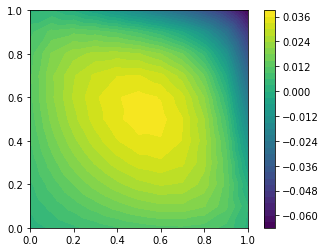

In [ ]:
p = plot(u)
plt.colorbar(p)

If $\Gamma = 0$, $u$ is only defined up to a constant, so one needs to impose an additional constraint. For instance,

\begin{equation}
\int_Q u(x) dx = \mu
\end{equation}

Average =  10.000000000000014


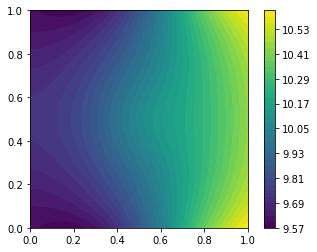

In [278]:
from dolfin import *

# Create mesh
mesh = UnitSquareMesh(64, 64)

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("-sin(5*x[0])", degree=2)
mu = Constant(10.0)
a = (inner(grad(u), grad(v)) + c*v + (u*d))*dx
L = f*v*dx + g*v*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()
u = u + mu
p = plot(u)
plt.colorbar(p)

print('Average = ', assemble(u*dx))

Mixed BCs: 

Dirichlet on left and right: $ \quad u(x) = u_0(x), \quad x \in (\{0 \} \times [0,1]) \enspace \bigcup \enspace (\{1\} \times [0,1])$

Neumann on top and bottom: $ \quad \mathbf{n} \cdot \nabla u(x) + \Gamma(x) u(x) = h(x), \quad x \in ([0,1]\times \{0\}) \enspace \bigcup \enspace ([0,1] \times \{ 1\} )$



In [9]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
h = Expression("-sin(x[0]*x[1])", degree=2)
Gamma = Expression("x[0]*x[1]", degree=1)

def u0_boundary(x, on_boundary):
    return on_boundary and (x[0]==1.0 or x[0]==0.0 )

u0 = Expression("sin(x[1])", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs

a = inner(nabla_grad(u), nabla_grad(v))*dx + Gamma * u * v * ds
L = f*v*dx + h*v*ds

u = Function(V)
solve(a==L, u, bc)

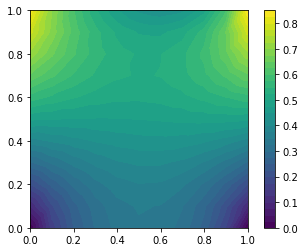

In [10]:
p = plot(u)
plt.colorbar(p)

## Check that the solvers work

Straightforward generalizations of the codes above can account for any combination of Neumann and Dirichlet boundary conditions and integral constrains, so let's compare them with the exact solutions of some simple problems

### Pure Dirichlet boundary

Start with the simple function $$u(x, y) = \frac{1}{2 \pi^2} \sin( \pi x)\sin(\pi y) + xy,$$ so that on the boundary $u(x,y) = u_0(x,y) = xy$. Then the problem we are trying to solve is 

$$ - \nabla^2 u(x, y) = \sin(\pi x) \sin(\pi y), \quad (x, y) \in Q       $$

$$ u(x, y) = xy, \quad (x, y) \in \partial Q            $$


In [76]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(74, 74)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("x[0]*x[1]", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("sin(pi * x[0]) * sin(pi * x[1])", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)


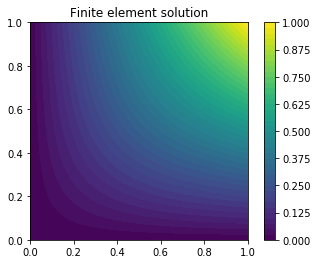

In [77]:
p = plot(u)
plt.colorbar(p)
plt.title("Finite element solution")
plt.savefig("DFEM.png")

In [78]:
mesh.num_cells

<bound method PyCapsule.num_cells of <dolfin.cpp.generation.UnitSquareMesh object at 0x7fffbaa2e150>>

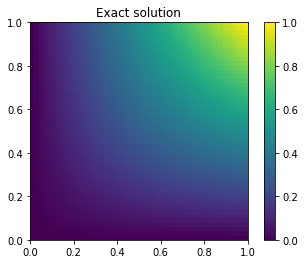

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def u_exact(x, y):
    return np.sin(np.pi * x)* np.sin(np.pi * y)/(2 * np.pi**2) + x*y

u_exact = np.vectorize(u_exact, otypes=[np.float64])

x_values = np.linspace(0, 1, 50)
y_values = np.linspace(0, 1, 50)

X, Y = np.meshgrid(x_values, y_values)  # The axes are in the wrong direction but the function looks the same
Z = u_exact(X, Y)

plt.imshow(Z, extent=(0,1,0,1), origin='lower')
plt.colorbar()
plt.title("Exact solution")
#plt.show()
plt.savefig("DExact.png")

In [80]:
u_exact = Expression("sin(pi * x[0])*sin(pi * x[1]) / (2 * pi * pi)  + x[0]*x[1]", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", (np.abs(u_e_array - u_array).max()))

Max error:  7.60913162562e-06


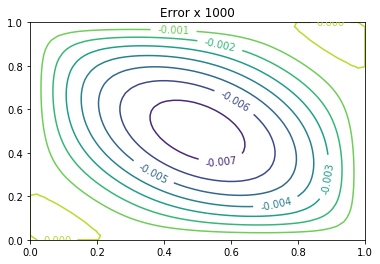

In [82]:
# This takes so long for some reason
u_e = np.vectorize(u_e)
u = np.vectorize(u)

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)

X,Y = np.meshgrid(x_values, y_values)
Z = (u(X,Y) - u_e(X,Y))*1000

fig, ax = plt.subplots()
#c = ax.imshow(Z, extent=(0,1,0,1), origin='lower')
#cb = fig.colorbar(c)
cs = ax.contour(X,Y,Z)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title("Error x 1000")
#plt.show()
plt.savefig("DError.png")

### Pure Neumann boundary

Next, we solve the problem 

$$ -\nabla^2 u = 2 \pi^2 \cos{\pi x}\cos{\pi y} , \quad (x, y) \in Q            $$


$$ \mathbf{n} \cdot \nabla u = 0, \quad (x, y) \in \partial Q    $$


$$ \int_Q u(x, y)dxdy = 0.      $$

The exact solution to this problem is 

$$ u_e(x, y) = \cos{\pi x}\cos{\pi y}           $$

Text(0.5, 1.0, 'Finite Element Solution')

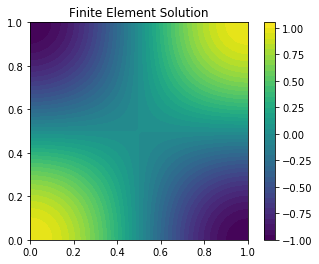

In [60]:
from dolfin import *
from scipy.special import sici

# Create mesh
mesh = UnitSquareMesh(74, 74)

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)
V = FunctionSpace(mesh, P1)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression(" 2 * pow(pi, 2) * cos(pi*x[0]) * cos(pi*x[1])",
               degree=2)
g = Expression("0", degree=0)
a = (inner(grad(u), grad(v)) + c*v + (u*d))*dx
L = f*v*dx + g*v*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()
p = plot(u)
plt.colorbar(p)
plt.title("Finite Element Solution")


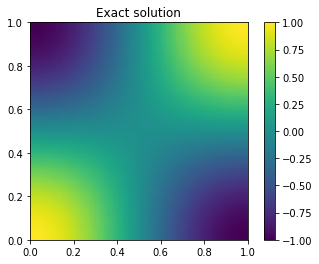

In [61]:
def u_exact(x,y):
    return np.cos(np.pi * x)*np.cos(np.pi*y)

u_exact = np.vectorize(u_exact, otypes=[np.float64])

x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

X,Y = np.meshgrid(x_values, y_values)

Z = u_exact(X,Y)
plt.imshow(Z, extent=(0,1,0,1), origin='lower')
plt.title('Exact solution')
plt.colorbar()
plt.show()

In [62]:
u_exact = Expression("cos(pi*x[0])*cos(pi*x[1])", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", (np.abs(u_e_array - u_array[0:-1]).max()))

Max error:  0.00088370669274


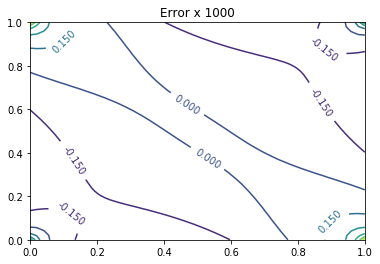

In [63]:
u_e = np.vectorize(u_e)
u = np.vectorize(u)

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)

X,Y = np.meshgrid(x_values, y_values)
Z = (u(X,Y) - u_e(X,Y))*1000

fig, ax = plt.subplots()
#c = ax.imshow(Z, extent=(0,1,0,1), origin='lower')
#cb = fig.colorbar(c)
cs = ax.contour(X,Y,Z)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title("Error x 1000")
plt.show()

### Mixed BCs

We now move on to the problem

$$ -\nabla^2 u = 2\pi^2 \sin{\pi x} \cos{\pi y}, \quad  (x, y) \in Q $$

$$ \mathbf{n} \cdot \nabla u = 0, \quad \{ y=0 \} \cup \{ y=1 \}$$

$$ u = 0, \quad \{ x=0 \} \cup \{ x=1 \}. $$

The exact solution is 

$$ u_e(x,y) = \sin{\pi x} \cos{\pi y}    $$


Text(0.5, 1.0, 'Finite Element Solution')

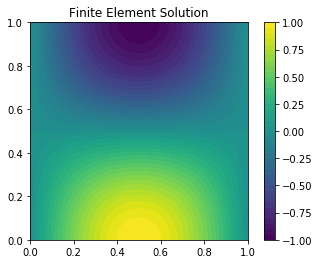

In [49]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitSquareMesh(75, 75)
V = FunctionSpace(mesh, "Lagrange", 2)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("2 * pow(pi, 2) * sin(pi*x[0]) * cos(pi*x[1])", degree=3)  # driving term
#h = Expression("0", degree=2)

def u0_boundary(x, on_boundary):
    return on_boundary and (x[0]==1.0 or x[0]==0.0 )

u0 = Expression("0.0", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a==L, u, bc)

p = plot(u)
plt.colorbar(p)
plt.title("Finite Element Solution")


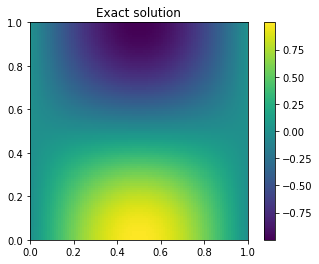

In [50]:
import numpy as np
import matplotlib.pyplot as plt
def u_exact(x,y):
    return np.sin(np.pi * x)*np.cos(np.pi*y)

u_exact = np.vectorize(u_exact, otypes=[np.float64])

x_values = np.linspace(0, 1, 100)
y_values = np.linspace(0, 1, 100)

X,Y = np.meshgrid(x_values, y_values)

Z = u_exact(X,Y)
plt.imshow(Z, extent=(0,1,0,1), origin='lower')
plt.title('Exact solution')
plt.colorbar()
plt.show()

In [51]:
u_exact = Expression("sin(pi*x[0])*cos(pi*x[1])", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", np.abs(u_e_array - u_array).max())

Max error:  8.62944764202e-07


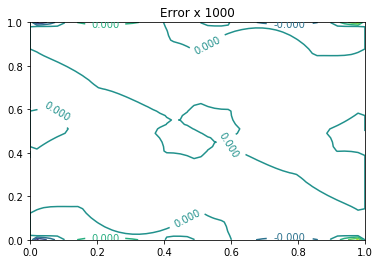

In [5]:
u_e = np.vectorize(u_e)
u = np.vectorize(u)

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)

X,Y = np.meshgrid(x_values, y_values)
Z = (u(X,Y) - u_e(X,Y))*1000

fig, ax = plt.subplots()
#c = ax.imshow(Z, extent=(0,1,0,1), origin='lower')
#cb = fig.colorbar(c)
cs = ax.contour(X,Y,Z)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title("Error x 1000")
plt.show()

## Poisson equation in a unit cube with uniform conductivity
We now move on to the 3D case on the simple domain $Q = [0, 1] \times [0, 1] \times [0, 1]$ with uniform conductivity $\sigma = 1$ and no electrodes. That is, we will sove the Poisson problem

$$ -\nabla^2 u(x, y, z) = f(x, y, z), \quad (x, y, z) \in Q $$

subject to Dirichlet, Neumann and mixed boundary conditions.

### Pure Dirichlet boundary

Dirichlet boundary conditions:    $ \quad u(x, y, z) = u_0(x, y, z), \quad (x, y, z) \in \partial Q$.

Use the integral form

\begin{equation}
\int_Q \nabla u \cdot \nabla v dx = \int_{Q} fv dx
\end{equation}


Text(0.5, 0.92, 'Finite element solution')

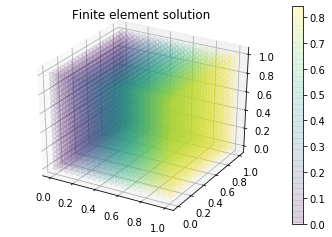

In [2]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitCubeMesh(20, 20, 20)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("sin(x[0])", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)
p = plot(u, alpha=0.1)
plt.colorbar(p)
plt.title("Finite element solution")

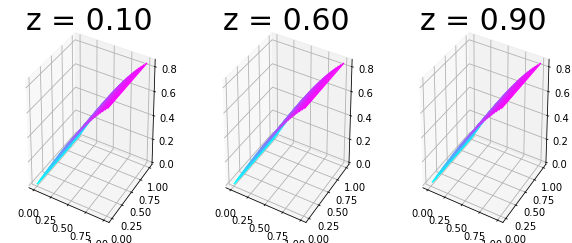

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

u_vector = np.vectorize(u)

X,Y = np.mgrid[0:1:50j, 0:1:50j]
Z_vals = [ 0.1, 0.6, 0.9 ]
num_subplots = len( Z_vals)

fig = plt.figure(figsize=(10, 4))
for i,z in enumerate( Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    ax.contour(X, Y, u_vector(X,Y,z), 50, cmap=cm.cool)
    ax.set_title('z = %.2f'%z, fontsize=30)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 4))
    plt.imshow(u_vector(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Finite element solution')
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))




interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

Let's solve a test problem and compare with the exact solution. Take the following Dirichlet problem:

$$ -\nabla^2 u = 3 \pi^2 \sin{\pi x} \sin{\pi y} \sin{\pi z}, \quad x \in Q$$
$$u(x)=0, \quad x \in \partial Q$$

The exact solution is 

$$ u_e (x, y, z) = \sin{\pi x} \sin{\pi y} \sin{\pi z}. $$

Text(0.5, 0.92, 'Finite element solution')

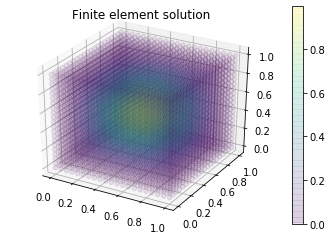

In [1]:
from dolfin import *
import matplotlib.pyplot as plt

# Create mesh and define function space
mesh = UnitCubeMesh(20, 20, 20)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("0", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("3 * pi * pi * sin(pi * x[0]) * sin(pi * x[1]) * sin(pi*x[2])", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)
p = plot(u, alpha=0.1)
plt.colorbar(p)
plt.title("Finite element solution")

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

u_vector = np.vectorize(u)


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 4))
    plt.imshow(u_vector(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Finite element solution')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

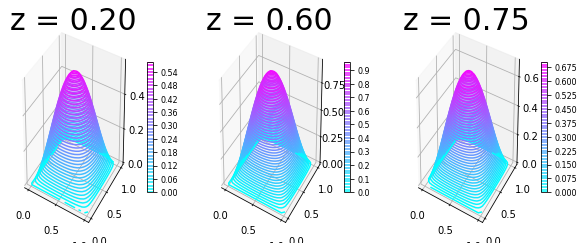

In [9]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

X,Y = np.mgrid[0:1:50j, 0:1:50j]
Z_vals = [ 0.2, 0.6, 0.75]
num_subplots = len( Z_vals)

fig = plt.figure(figsize=(10, 4))
for i,z in enumerate( Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    contour = ax.contour(X, Y, u_vector(X,Y,z), 50, cmap=cm.cool)
    ax.set_title('z = %.2f'%z, fontsize=30)
    cbar = fig.colorbar(contour, ax=ax, shrink=0.6)
    cbar.ax.tick_params(labelsize=8)


Text(0.5, 0.92, 'Exact solution')

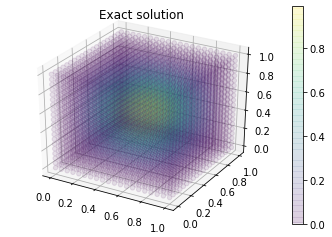

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
x_values = np.linspace(0,1,20)
y_values = np.linspace(0,1,20)
z_values = np.linspace(0,1,20)

def u_exact(x, y, z):
    return np.sin(np.pi*x) * np.sin(np.pi*y) * np.sin(np.pi*z)

#u_exact = np.vectorize(u_exact)

X,Y,Z = np.meshgrid(x_values, y_values, z_values)

us = np.array([u_exact(x, y, z) for x, y, z in zip(np.ravel(X), np.ravel(Y), np.ravel(Z))])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(X, Y, Z, c = us,  alpha=0.1, cmap='viridis')
cbar = fig.colorbar(cax) # Add a color bar

ax.set_title("Exact solution")


In [5]:
# Plot the exact solution and compare

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)


def u_exact(x, y, z):
    return np.sin(np.pi*x) * np.sin(np.pi*y) * np.sin(np.pi*z)

u_exact = np.vectorize(u_exact)

def interactive_plot(z_value):
    X,Y = np.meshgrid(x_values, y_values)
    plt.figure(figsize=(8, 4))
    plt.imshow(u_exact(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Exact Solution')
    plt.colorbar()
    plt.show()
    
interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

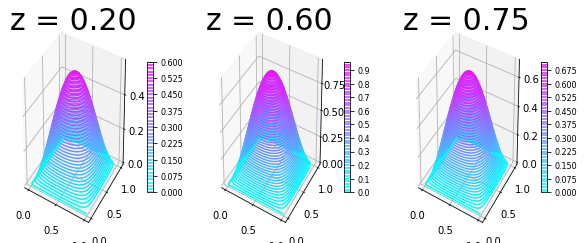

In [11]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

X,Y = np.mgrid[0:1:50j, 0:1:50j]
Z_vals = [ 0.2, 0.6, 0.75]
num_subplots = len( Z_vals)

fig = plt.figure(figsize=(10, 4))
for i,z in enumerate( Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    contour = ax.contour(X, Y, u_exact(X,Y,z), 50, cmap=cm.cool)
    ax.set_title('z = %.2f'%z, fontsize=30)
    cbar = fig.colorbar(contour, ax=ax, shrink=0.6)
    cbar.ax.tick_params(labelsize=8)


In [3]:
import numpy as np
u_exact = Expression("sin(pi*x[0])*sin(pi*x[1])*sin(pi*x[2])", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", np.abs(u_e_array - u_array).max())
print("Mean error: ", np.mean(np.abs(u_e_array - u_array)))

Max error:  0.00410975510685
Mean error:  0.000920549060849


In [6]:
from ipywidgets import interact
u_e = np.vectorize(u_e)
u = np.vectorize(u)

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)

def interactive_plot(z_value):
    X,Y = np.meshgrid(x_values, y_values)
    plt.figure(figsize=(8, 4))
    plt.imshow((u_e(X, Y, z_value) - u(X,Y,z_value))*1000, extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Error x 1000')
    plt.colorbar()
    plt.show()

interact(interactive_plot, z_value=(0, 1, 0.1))


interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

## Pure Neumann Boundary

Solve the following test Neumann problem and compare with the exact solution.

$$ -\nabla^2 u = 3\pi^2 \cos{\pi x}\cos{\pi y}\cos{\pi z}, \quad x \in Q $$
$$ \nabla u \cdot \mathbf{n} = 0, \quad x\in \partial Q,          $$

$$ \int_Q u \thinspace dx = 0.     $$

In this case, the exact solution is 

$$ u_e(x, y, z) = \cos{\pi x} \cos{\pi y} \cos{\pi z}       $$


In [ ]:
from dolfin import *
from scipy.special import sici

# Create mesh
mesh = UnitCubeMesh(20, 20, 20)

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)
V = FunctionSpace(mesh, P1)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression(" 3 * pi * pi * cos(pi*x[0]) * cos(pi*x[1]) * cos(pi * x[2])",
               degree=2)
g = Expression("0", degree=2)
a = (inner(grad(u), grad(v)) + c*v + (u*d))*dx
L = f*v*dx + g*v*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()
p = plot(u, alpha = 0.5)
plt.colorbar(p)
plt.title("Finite Element Solution")

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

u = np.vectorize(u)


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 4))
    plt.imshow(u(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Finite element solution')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

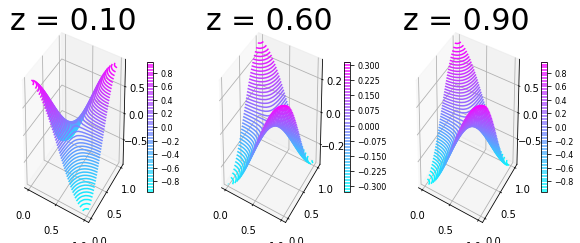

In [63]:
u = np.vectorize(u)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

X,Y = np.mgrid[0:1:50j, 0:1:50j]
Z_vals = [ 0.1, 0.6, 0.9 ]
num_subplots = len( Z_vals)

fig = plt.figure(figsize=(10, 4))
for i,z in enumerate( Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    contour = ax.contour(X, Y, u(X,Y,z), 50, cmap=cm.cool)
    ax.set_title('z = %.2f'%z, fontsize=30)
    cbar = fig.colorbar(contour, ax=ax, shrink=0.6)
    cbar.ax.tick_params(labelsize=8)

    

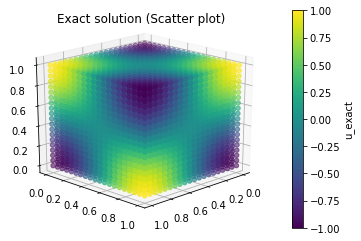

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x_values = np.linspace(0, 1, 20)
y_values = np.linspace(0, 1, 20)
z_values = np.linspace(0, 1, 20)

def u_exact(x, y, z):
    return np.cos(np.pi*x) * np.cos(np.pi*z) * np.cos(np.pi*y)

X, Y, Z = np.meshgrid(x_values, y_values, z_values)
us = u_exact(X, Y, Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Reshape X, Y, Z, and us to 1D arrays for scatter plot
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
us_flat = us.flatten()

# Scatter plot with color determined by u_exact
cax = ax.scatter(x_flat, y_flat, z_flat, c=us_flat, cmap='viridis')

cbar = fig.colorbar(cax)  # Add a color bar
cbar.set_label('u_exact')

ax.set_title("Exact solution (Scatter plot)")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()


In [8]:
# Plot the exact solution and compare

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)


def u_exact(x, y, z):
    return np.cos(np.pi*x) * np.cos(np.pi*y) * np.cos(np.pi*z)

u_exact = np.vectorize(u_exact)

def interactive_plot(z_value):
    X,Y = np.meshgrid(x_values, y_values)
    plt.figure(figsize=(8, 4))
    plt.imshow(u_exact(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Exact Solution')
    plt.colorbar()
    plt.show()
    
interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

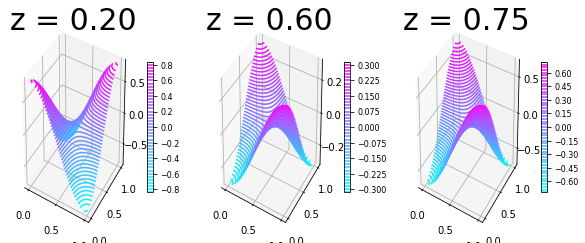

In [64]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

X,Y = np.mgrid[0:1:50j, 0:1:50j]
Z_vals = [ 0.2, 0.6, 0.75]
num_subplots = len( Z_vals)

fig = plt.figure(figsize=(10, 4))
for i,z in enumerate( Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    contour = ax.contour(X, Y, u_exact(X,Y,z), 50, cmap=cm.cool)
    ax.set_title('z = %.2f'%z, fontsize=30)
    cbar = fig.colorbar(contour, ax=ax, shrink=0.6)
    cbar.ax.tick_params(labelsize=8)


In [69]:
u_exact = Expression("cos(pi*x[0])*cos(pi*x[1])*cos(pi*x[2])", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", np.abs(u_e_array - u_array[0:-1]).max())
print("Mean error: ", np.mean(np.abs(u_e_array - u_array[0:-1])))

Max error:  0.0108793511224
Mean error:  0.00175702655897


In [9]:
u_e = np.vectorize(u_e)
u = np.vectorize(u)

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)

def interactive_plot(z_value):
    X,Y = np.meshgrid(x_values, y_values)
    plt.figure(figsize=(8, 4))
    plt.imshow((u_e(X, Y, z_value) - u(X,Y,z_value))*1000, extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Error x 1000')
    plt.colorbar()
    plt.show()

interact(interactive_plot, z_value=(0, 1, 0.1))


interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

## Mixed BCs

Let us examine now a problem with mixed boundary conditions:
$$-\nabla^2 u(x, y, z) = 3\pi^2 \sin{\pi x}\sin{\pi y}\cos{\pi z}, \quad (x, y, z) \in Q $$

$$u(x=0) = u(x=1) = u(y=0) = u(y=1) = 0,$$
$$\nabla u \cdot \mathbf{n} = 0, \quad z=0, 1.$$

For which the exact solution is 
$$u_e(x, y, z) = \sin{\pi x} \sin{\pi y} \cos{\pi z}$$


Text(0.5, 0.92, 'Finite Element Solution')

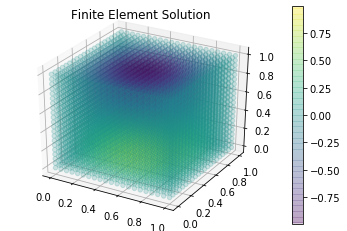

In [39]:
from dolfin import *
import matplotlib.pyplot as plt

# This takes a very long time, had to lower degree to speed it up

# Create mesh and define function space
mesh = UnitCubeMesh(20, 20, 20)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("3 * pow(pi, 2) * sin(pi*x[0])*sin(pi*x[1])*cos(pi*x[2])", degree=2)  # driving term

def u0_boundary(x, on_boundary):
    return on_boundary and (x[0]==1.0 or x[0]==0.0 or x[1]==1.0 or x[1]==0.0 )

u0 = Expression("0.0", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx

u = Function(V)
solve(a==L, u, bc)

p = plot(u, alpha=0.2)
plt.colorbar(p)
plt.title("Finite Element Solution")

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

u_vector = np.vectorize(u)


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 4))
    plt.imshow(u_vector(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Finite element solution')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

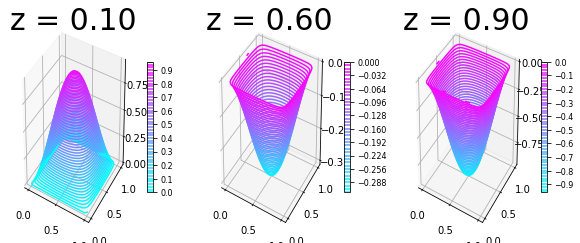

In [156]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

X,Y = np.mgrid[0:1:50j, 0:1:50j]
Z_vals = [ 0.1, 0.6, 0.9 ]
num_subplots = len( Z_vals)

fig = plt.figure(figsize=(10, 4))
for i,z in enumerate( Z_vals):
    ax = fig.add_subplot(1 , num_subplots , i+1, projection='3d')
    contour = ax.contour(X, Y, u(X,Y,z), 50, cmap=cm.cool)
    ax.set_title('z = %.2f'%z, fontsize=30)
    cbar = fig.colorbar(contour, ax=ax, shrink=0.6)
    cbar.ax.tick_params(labelsize=8)



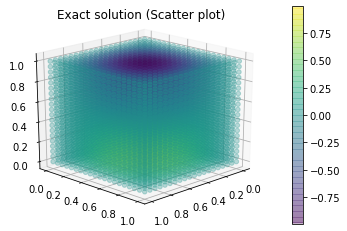

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x_values = np.linspace(0, 1, 20)
y_values = np.linspace(0, 1, 20)
z_values = np.linspace(0, 1, 20)

def u_exact(x, y, z):
    return np.sin(np.pi*x) * np.cos(np.pi*z) * np.sin(np.pi*y)

X, Y, Z = np.meshgrid(x_values, y_values, z_values)
us = u_exact(X, Y, Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Reshape X, Y, Z, and us to 1D arrays for scatter plot
x_flat = X.flatten()
y_flat = Y.flatten()
z_flat = Z.flatten()
us_flat = us.flatten()

# Scatter plot with color determined by u_exact
cax = ax.scatter(x_flat, y_flat, z_flat, c=us_flat, cmap='viridis', alpha=0.3)

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Exact solution (Scatter plot)")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()


In [42]:
u_exact = Expression("sin(pi*x[0])*sin(pi*x[1])*cos(pi*x[2])", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", np.abs(u_e_array - u_array).max())
print("Mean error: ", np.mean(np.abs(u_e_array - u_array)))

Max error:  0.00519703392551
Mean error:  0.00106613680254


In [43]:
u_e = np.vectorize(u_e)
u = np.vectorize(u)

x_values = np.linspace(0,1,50)
y_values = np.linspace(0,1,50)

def interactive_plot(z_value):
    X,Y = np.meshgrid(x_values, y_values)
    plt.figure(figsize=(8, 4))
    plt.imshow((u_e(X, Y, z_value) - u(X,Y,z_value))*1000, extent=(0,1,0,1), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Error x 1000')
    plt.colorbar()
    plt.show()

interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

<Figure size 576x288 with 0 Axes>

## Circular domains

Repeat the above operations for the unit circle $Q = \{(x, y) \in \mathbb{R}^2: \quad x^2 + y^2 \leq 1 \}$

In [12]:
from dolfin import *
from scipy.special import sici
import mshr
import numpy as np

domain = mshr.Circle(Point(0.,0.),1.0,20)
mesh = mshr.generate_mesh(domain, 20)

In [77]:
mesh

In [14]:
import matplotlib.pyplot as plt

V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("1", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)


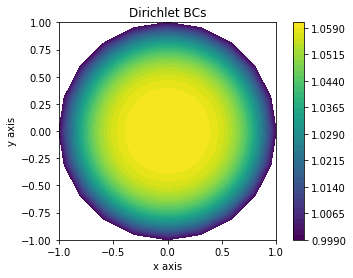

In [15]:
p=plot(u)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Dirichlet BCs")
plt.colorbar(p)

Text(0.5, 1.0, 'Robin BCs')

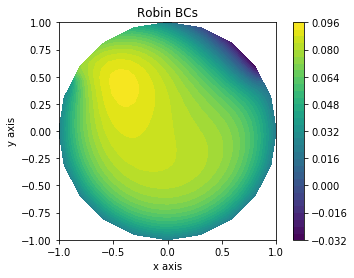

In [16]:
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
h = Expression("-sin(x[0]*(x[1]>0.5))", degree=2)
Gamma = Expression("10", degree=1)

a = inner(nabla_grad(u), nabla_grad(v))*dx + Gamma * u * v * ds
L = f*v*dx + h*v*ds

u = Function(V)
solve(a==L, u)

p = plot(u)
plt.colorbar(p)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Robin BCs")

Integral =  2.233456475320139e-17


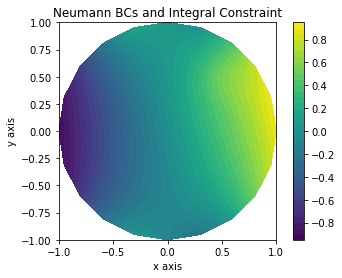

In [12]:
# Pure Neumann BCs with integral constraint

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("-sin(5*x[0])", degree=2)
a = (inner(grad(u), grad(v)) + c*v + (u*d))*dx
L = f*v*dx + g*v*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()
p = plot(u)
plt.colorbar(p)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Neumann BCs and Integral Constraint")
print('Integral = ', assemble(u*dx))

Let's now select a subset of the boundary to simulate our electrodes. We'll divide the circle in 30 pieces $\theta_n = n \frac{\pi}{15}$ alternate electrodes along the boundary and store their locations in an array. Boundary conditions will then be passed into the solver by proximity to these stored points


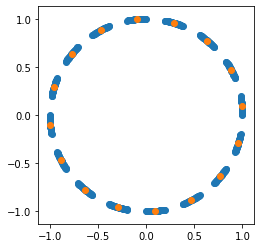

In [75]:
electrodes = []
electrodes_center = []

for i in range(16):
    for j in np.linspace(0,1,30):
        electrodes.append([np.cos((2*i+j)*np.pi/16), np.sin((2*i+j)*np.pi/16)])
    electrodes_center.append([np.cos((2*i+0.5)*np.pi/16), np.sin((2*i+0.5)*np.pi/16)])
electrodes = np.array(electrodes)
electrodes_center = np.array(electrodes_center)

fig1, ax = plt.subplots()

ax.scatter(electrodes[:,0], electrodes[:,1])
ax.scatter(electrodes_center[:,0], electrodes_center[:,1])
ax.set_aspect(1)

In [76]:
electrodes_center

array([[ 0.99518473,  0.09801714],
       [ 0.88192126,  0.47139674],
       [ 0.63439328,  0.77301045],
       [ 0.29028468,  0.95694034],
       [-0.09801714,  0.99518473],
       [-0.47139674,  0.88192126],
       [-0.77301045,  0.63439328],
       [-0.95694034,  0.29028468],
       [-0.99518473, -0.09801714],
       [-0.88192126, -0.47139674],
       [-0.63439328, -0.77301045],
       [-0.29028468, -0.95694034],
       [ 0.09801714, -0.99518473],
       [ 0.47139674, -0.88192126],
       [ 0.77301045, -0.63439328],
       [ 0.95694034, -0.29028468]])

In [29]:
def dist_to_electrode(x, y):
    distances = []
    for electrode in electrodes:
        x0 = electrode[0]
        y0 = electrode[1]
        distances.append(np.sqrt((x-x0)**2 + (y-y0)**2 ))
    return min(distances)
        

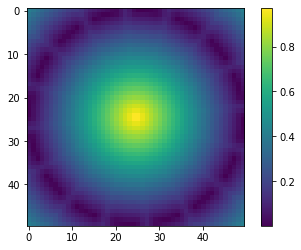

In [30]:
x_values = np.linspace(-1,1,50)
y_values = np.linspace(-1,1,50)
X, Y = np.meshgrid(x_values, y_values)
dist_vectorized = np.vectorize(dist_to_electrode)
Z = dist_vectorized(X,Y)
p=plt.imshow(Z)
plt.colorbar(p)

In [31]:
tolerance = 0.02

def is_electrode(x,y):
    if dist_to_electrode(x,y)<tolerance:
        return True
    else:
        return False

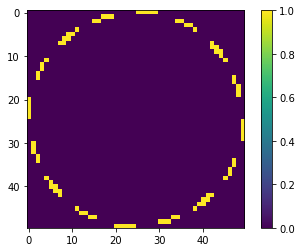

In [32]:
is_electrode_vectorized = np.vectorize(is_electrode)
Z = is_electrode_vectorized(X,Y)
p=plt.imshow(Z)
plt.colorbar(p)

In [78]:
U=[] # electrode voltages
Z=[] # electrode impedances
for i in range(16):
    U.append((-1)**i)
    Z.append(1)
def nearest_electrode(x,y):
    distances = []
    for electrode in electrodes_center:
        x0 = electrode[0]
        y0 = electrode[1]
        distances.append(np.sqrt((x-x0)**2 + (y-y0)**2 ))
    return distances.index(min(distances))  

In [79]:
boundary_markers = MeshFunction('size_t', mesh, 1)

class BoundaryE0(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==0) and is_electrode(x[0], x[1])

class BoundaryE1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==1)  and is_electrode(x[0], x[1])
    
class BoundaryE2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==2)  and is_electrode(x[0], x[1])

class BoundaryE3(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==3) and is_electrode(x[0], x[1])

class BoundaryE4(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==4) and is_electrode(x[0], x[1])

class BoundaryE5(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==5)  and is_electrode(x[0], x[1])

class BoundaryE6(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==6) and is_electrode(x[0], x[1])

class BoundaryE7(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==7) and is_electrode(x[0], x[1])

class BoundaryE8(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==8) and is_electrode(x[0], x[1])

class BoundaryE9(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==9) and is_electrode(x[0], x[1])
    
class BoundaryE10(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==10) and is_electrode(x[0], x[1])
    
class BoundaryE11(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==11) and is_electrode(x[0], x[1])
    
class BoundaryE12(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==12) and is_electrode(x[0], x[1])
    
class BoundaryE13(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==13) and is_electrode(x[0], x[1])
    
class BoundaryE14(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==14) and is_electrode(x[0], x[1])

class BoundaryE15(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (nearest_electrode(x[0],x[1])==15) and is_electrode(x[0], x[1])
    

be0 = BoundaryE0()
be1 = BoundaryE1()
be2 = BoundaryE2()
be3 = BoundaryE3()
be4 = BoundaryE4()
be5 = BoundaryE5()
be6 = BoundaryE6()
be7 = BoundaryE7()
be8 = BoundaryE8()
be9 = BoundaryE9()
be10 = BoundaryE10()
be11 = BoundaryE11()
be12 = BoundaryE12()
be13 = BoundaryE13()
be14 = BoundaryE14()
be15 = BoundaryE15()

be0.mark(boundary_markers, 1)
be1.mark(boundary_markers, 2)
be2.mark(boundary_markers, 3)
be3.mark(boundary_markers, 4)
be4.mark(boundary_markers, 5)
be5.mark(boundary_markers, 6)
be6.mark(boundary_markers, 7)
be7.mark(boundary_markers, 8)
be8.mark(boundary_markers, 9)
be9.mark(boundary_markers, 10)
be10.mark(boundary_markers, 11)
be11.mark(boundary_markers, 12)
be12.mark(boundary_markers, 13)
be13.mark(boundary_markers, 14)
be14.mark(boundary_markers, 15)
be15.mark(boundary_markers, 16)


ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

Text(0, 0.5, 'y axis')

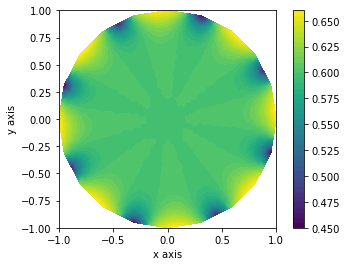

In [80]:
V = FunctionSpace(mesh, "Lagrange", 2)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

a = inner(nabla_grad(u), nabla_grad(v))*dx
L =  0

for i in range(16):
    a = a + u*v*ds(i)
    L = L + v*(U[i])*ds(i)


u = Function(V)
solve(a==L, u)

p = plot(u)
plt.colorbar(p)
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.title("EIT with 16 electrodes")

## Cylindrical Domains

Repeat the same example on the cylinder $Q = \{(x, y, z) \in \mathbb{R}^3: \quad x^2 + y^2 \leq 1, \quad 0\leq z \leq 1 \}$


In [2]:
from dolfin import *
from mshr import *

#Making a cylindrical geometry
cylinder = Cylinder(Point(0, 0, 0), Point(0, 0, 1), 1, 1)
geometry = cylinder

# Making Mesh (40 corresponds to the mesh density)
mesh = generate_mesh(geometry, 40)

In [2]:
mesh

In [3]:

import matplotlib.pyplot as plt

V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("x[2]", degree=1)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("x[2]", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)


Text(0.5, 0.92, 'Dirichlet BCs')

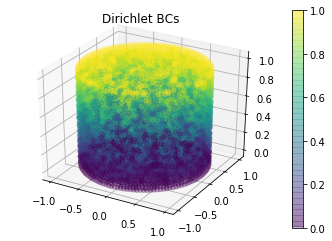

In [4]:
#u.set_allow_extrapolation(True)
p=plot(u, alpha=0.3)
plt.colorbar(p)
plt.title("Dirichlet BCs")

In [5]:
u(0,0.99,0.99)

0.99060295152839961

In [75]:
# There is something artificial about fenics plotting for this geometry... Visualization took a while but 
# the following code shows the solution is well behaved

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def u_extended(x,y,z):
    if (x**2 + y**2 < 1.0):
        return u(x,y,z)
    else:
        return 0.0

u_vector = np.vectorize(u_extended)

def interactive_plot(z_value):
    x = np.linspace(-1, 1, 30)
    y = np.linspace(-1,1,30)
    X,Y = np.meshgrid(x, y)
    plt.figure(figsize=(8, 4))
    plt.imshow(u_vector(X, Y, z_value), extent=(-0.99,0.99,-0.99,0.99), origin='lower')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Dirichlet Boundary Condition')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0.01, 0.99, 0.1))

interactive(children=(FloatSlider(value=0.41000000000000003, description='z_value', max=0.99, min=0.01), Outpu…

<function __main__.interactive_plot(z_value)>

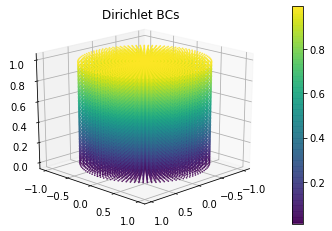

In [6]:
# It looks like something is wrong with Dolfin plotting, let's try to generate the 3D
# plot using matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

theta_list = np.linspace(0, 2*np.pi, 100)
r_list = np.linspace(0.01, 0.99, 20)
z_list = np.linspace(0.01, 0.99, 30)

x_values = []
y_values = []
z_values = []

for z in z_list:
    for r in r_list:
        for theta in theta_list:
            x_values.append(r*np.cos(theta))
            y_values.append(r*np.sin(theta))
            z_values.append(z)
            
#u.set_allow_extrapolation(True)
us = []

for i in range(len(x_values)):
    us.append(u(x_values[i], y_values[i], z_values[i]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=us, cmap='viridis', s=0.5, alpha=0.8, marker='o')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Dirichlet BCs")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

In [32]:
# Try to do the slices in a different way

theta_list = np.linspace(0, 2*np.pi, 150)
r_list = np.linspace(0.01, 0.99, 30)

x_values = []
y_values = []

for theta in theta_list:
    for r in r_list:
        x_values.append(r*np.cos(theta))
        y_values.append(r*np.sin(theta))

def interactive_plot(z_value):
    u_values = []
    for i in range(len(x_values)):
        x = x_values[i]
        y = y_values[i]
        u_values.append(u(x, y, z_value))
    plt.figure(figsize=(8, 4))
    plt.scatter(x_values, y_values, c=u_values)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Dirichlet Boundary Conditions')
    plt.colorbar()
    plt.show()

interact(interactive_plot, z_value=(0.01, 0.99, 0.1))


NameError: name 'interact' is not defined

Text(0.5, 0.92, 'Robin BCs')

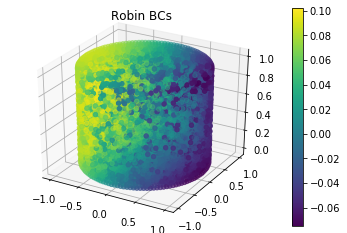

In [33]:
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
h = Expression("-sin(x[0])", degree=2)
Gamma = Expression("10", degree=1)

a = inner(nabla_grad(u), nabla_grad(v))*dx + Gamma * u * v * ds
L = f*v*dx + h*v*ds

u = Function(V)
solve(a==L, u)

p = plot(u)
plt.colorbar(p)
plt.title("Robin BCs")

In [50]:
from ipywidgets import interact
theta_list = np.linspace(0, 2*np.pi, 150)
r_list = np.linspace(0.01, 0.99, 30)

x_values = []
y_values = []

for theta in theta_list:
    for r in r_list:
        x_values.append(r*np.cos(theta))
        y_values.append(r*np.sin(theta))

def interactive_plot(z_value):
    u_values = []
    for i in range(len(x_values)):
        x = x_values[i]
        y = y_values[i]
        u_values.append(u(x, y, z_value))
    plt.figure(figsize=(8, 4))
    plt.scatter(x_values, y_values, c=u_values)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Robin Boundary Conditions')
    plt.colorbar()
    plt.show()

interact(interactive_plot, z_value=(0.01, 0.99, 0.1))

interactive(children=(FloatSlider(value=0.41000000000000003, description='z_value', max=0.99, min=0.01), Outpu…

<function __main__.interactive_plot(z_value)>

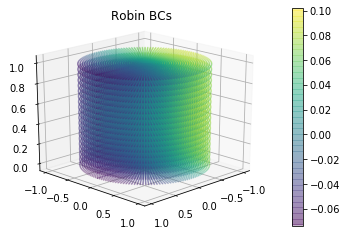

In [49]:

theta_list = np.linspace(0, 2*np.pi, 150)
r_list = np.linspace(0.01, 0.99, 30)
z_list = np.linspace(0, 1, 20)

x_values = []
y_values = []
z_values = []

for z in z_list:
    for r in r_list:
        for theta in theta_list:
            x_values.append(r*np.cos(theta))
            y_values.append(r*np.sin(theta))
            z_values.append(z)
            
u.set_allow_extrapolation(True)
us = []

for i in range(len(x_values)):
    us.append(u(x_values[i], y_values[i], z_values[i]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=us, cmap='viridis', s=0.5, alpha=0.3, marker='o')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Robin BCs")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Integral =  9.999999999999812


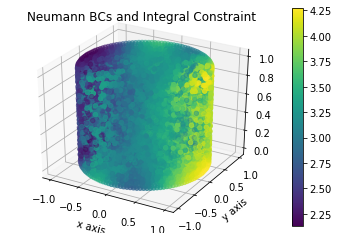

In [65]:
# Pure Neumann BCs with integral constraint

# Need to double check the volume

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("-sin(5*x[0])", degree=2)
mu = Constant(10.0)
a = (inner(grad(u), grad(v)) + c*v + (u*d))*dx
L = f*v*dx + g*v*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()
u = u + mu/assemble((u/u)*dx)
p = plot(u)
plt.colorbar(p)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Neumann BCs and Integral Constraint")
print('Integral = ', assemble(u*dx))

In [64]:
assemble((u/u)*dx)

Calling FFC just-in-time (JIT) compiler, this may take some time.


3.1195570440361005

Calling FFC just-in-time (JIT) compiler, this may take some time.


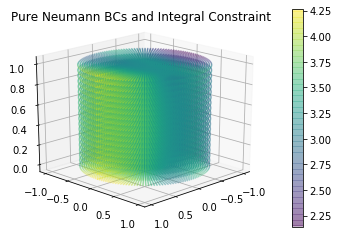

In [68]:
volume = assemble((u/u)*dx)
theta_list = np.linspace(0, 2*np.pi, 150)
r_list = np.linspace(0.01, 0.99, 30)
z_list = np.linspace(0, 1, 20)

x_values = []
y_values = []
z_values = []

for z in z_list:
    for r in r_list:
        for theta in theta_list:
            x_values.append(r*np.cos(theta))
            y_values.append(r*np.sin(theta))
            z_values.append(z)
            
w.set_allow_extrapolation(True)
u, c = w.split()
us = []

for i in range(len(x_values)):
    us.append(u(x_values[i], y_values[i], z_values[i]) + mu/volume)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=us, cmap='viridis', s=0.5, alpha=0.3, marker='o')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Pure Neumann BCs and Integral Constraint")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

Let us compare with the exact solution for the already seen problem

$$- \nabla^2 u(x, y, z) = \pi^2 \sin{\pi z}, \quad (x, y, z) \in Q, $$

$$ u(x, y, z) = \sin{\pi z}, \quad (x, y, z) \in \partial Q $$.

For which the exact solution is 

$$u_e(x, y, z) = \sin{\pi z}$$

In [5]:
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("sin(pi*x[2])", degree=2)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(pi, 2)*sin(pi*x[2])", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)

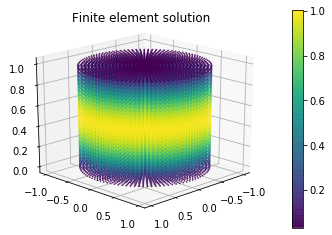

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

theta_list = np.linspace(0, 2*np.pi, 100)
r_list = np.linspace(0.01, 0.99, 20)
z_list = np.linspace(0.01, 0.99, 30)

x_values = []
y_values = []
z_values = []

for z in z_list:
    for r in r_list:
        for theta in theta_list:
            x_values.append(r*np.cos(theta))
            y_values.append(r*np.sin(theta))
            z_values.append(z)
            
u.set_allow_extrapolation(True)
us = []

for i in range(len(x_values)):
    us.append(u(x_values[i], y_values[i], z_values[i]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=us, cmap='viridis', s=0.5, alpha=0.8, marker='o')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Finite element solution")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

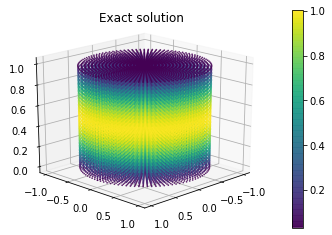

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

theta_list = np.linspace(0, 2*np.pi, 100)
r_list = np.linspace(0.01, 0.99, 20)
z_list = np.linspace(0.01, 0.99, 30)

x_values = []
y_values = []
z_values = []

for z in z_list:
    for r in r_list:
        for theta in theta_list:
            x_values.append(r*np.cos(theta))
            y_values.append(r*np.sin(theta))
            z_values.append(z)
            
ues = []

def u_exact(x,y,z):
    return np.sin(np.pi*z)

for i in range(len(x_values)):
    ues.append(u_exact(x_values[i], y_values[i], z_values[i]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=us, cmap='viridis', s=0.5, alpha=0.8, marker='o')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Exact solution")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

In [9]:
u_exact = Expression("sin(pi * x[2])", degree=2)


u_nodal_values = u.vector()
u_array = u_nodal_values.get_local()
u_e = interpolate(u_exact, V)
u_e_array = u_e.vector().get_local()
print("Max error: ", np.abs(u_e_array - u_array).max())
print("Mean error: ", np.mean(np.abs(u_e_array - u_array)))

Max error:  0.00563590611106
Mean error:  0.000634832761404


Let's now move on to creating the electrodes. We'll use three rings of electrodes, each with 16 electrodes. The size of the electrodes is chosen such that 60% of the surface of the cylinder is covered. Each electrode is a rectangle of size $x = \frac{7}{30}$ along the $z$ axis and $\alpha = \frac{3\pi}{56}$ along the $\theta$ direction, and they are separated by a distance $y = \frac{3}{20}$ in the $z$ direction and $\beta = \frac{\pi}{14}$ in the $\theta$ direction

In [125]:
import numpy as np

tolerance = 0.001

alpha = 3*np.pi/56
beta = np.pi/14
x = 7/30
y = 3/20

electrodes_plane = []

l = 0
theta_start = 0

while l<16:
    elec = []
    s=0
    
    while s<100:
        theta = theta_start + alpha*s/100
        elec.append([np.cos(theta), np.sin(theta)])
        
        s+=1
    electrodes_plane.append(elec)   
    l+=1
    theta_start = theta + beta



In [126]:
electrodes_plane = np.array(electrodes_plane)
electrodes_plane[0,:,0]

array([ 1.        ,  0.99999858,  0.99999434,  0.99998725,  0.99997734,
        0.99996459,  0.99994902,  0.99993061,  0.99990936,  0.99988529,
        0.99985838,  0.99982864,  0.99979607,  0.99976067,  0.99972243,
        0.99968136,  0.99963747,  0.99959074,  0.99954117,  0.99948878,
        0.99943356,  0.9993755 ,  0.99931462,  0.9992509 ,  0.99918436,
        0.99911498,  0.99904278,  0.99896774,  0.99888987,  0.99880918,
        0.99872566,  0.9986393 ,  0.99855012,  0.99845811,  0.99836328,
        0.99826561,  0.99816512,  0.9980618 ,  0.99795565,  0.99784668,
        0.99773488,  0.99762025,  0.9975028 ,  0.99738252,  0.99725942,
        0.99713349,  0.99700474,  0.99687316,  0.99673876,  0.99660154,
        0.99646149,  0.99631863,  0.99617294,  0.99602442,  0.99587309,
        0.99571894,  0.99556196,  0.99540217,  0.99523956,  0.99507413,
        0.99490587,  0.99473481,  0.99456092,  0.99438422,  0.9942047 ,
        0.99402236,  0.99383721,  0.99364924,  0.99345846,  0.99

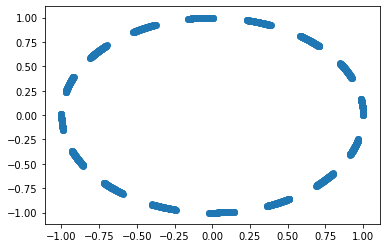

In [127]:
import matplotlib.pyplot as plt

electrodes_plane = np.array(electrodes_plane)

x_values = []
y_values = []

for i in range(len(electrodes_plane)):
    x_values.append(electrodes_plane[i,:,0])
    y_values.append(electrodes_plane[i,:,1])

plt.scatter(x_values, y_values)
plt.show()

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

tolerance = 0.001

alpha = 3*np.pi/56
beta = np.pi/14
x = 7/30
y = 3/20

electrodes = []


l=0
theta_start = 0
z_start = 0 
    

while l<16:
    elec1 = []
    elec2 = []
    elec3 = []

    for z in np.linspace(0, x, 50):
        s=0
        while s<100:
            theta = theta_start + alpha*s/100
            elec1.append([np.cos(theta), np.sin(theta), z, l])
            elec2.append([np.cos(theta), np.sin(theta), z+x+y, 16 + l])
            elec3.append([np.cos(theta), np.sin(theta), z+2*x+2*y, 32 + l])
            
            s+=1
    electrodes.append(elec1)
    electrodes.append(elec2)
    electrodes.append(elec3)
    
    l+=1
    theta_start = theta + beta


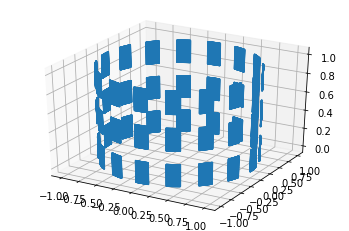

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

electrodes = np.array(electrodes)

x_values = []
y_values = []
z_values = []

for i in range(len(electrodes)):
    for j in range(len(electrodes[1,:,1])):
        x_values.append(electrodes[i,j,0])
        y_values.append(electrodes[i,j,1])
        z_values.append(electrodes[i,j,2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, s=0.5, alpha=0.8, marker='o')

plt.show()

In [5]:
def is_electrode(x, y, z):
    if (x**2 + y**2 - 1 < tolerance) and  (1 - x**2 - y**2 < tolerance):
        for electrode in electrodes:
            for point in electrode:
                distance = np.sqrt((point[0] - x)**2 + (point[1] - y)**2 + (point[2]-z)**2)
                if distance < tolerance:
                    return True
    else:
        return False

def nearest_electrode(x, y, z):
    i=0
    distances = []
    for electrode in electrodes:
        distances1 = []
        for point in electrode:
            distance = np.sqrt((point[0] - x)**2 + (point[1] - y)**2 + (point[2]-z)**2)
            distances1.append(distance)
        distances.append(min(distances1))
    return distances.index(min(distances)), min(distances)
        

            


In [7]:
nearest_electrode(0,0.8,0)

(12, 0.19999999999999996)

Clearly something isn't right and this isn't an efficient way of defining the electrodes so let's try a different approach. We'll define the electrodes in cylindrical coordinates, this is cumbersome as one needs to take into account that the functions $\sin{x}$ and $\cos{x}$ are not 1-1.

In [23]:
import numpy as np

tolerance = 0.02

def cylindrical(x,y):
    r = np.sqrt(x**2 + y**2)
    if x>=0 and y>=0:
        theta = np.arccos(x/r)
    elif x<0 and y>=0:
        theta = np.arccos(x/r)
    elif x<0 and y<0:
        theta = np.pi - np.arcsin(y/r)
    elif x>=0 and y<0:
        theta = 2 * np.pi + np.arcsin(y/r)
        
    return r, theta

alpha = 3*np.pi/56
beta = np.pi/14
x = 7/30
y = 3/20

theta_limits = []
phi0 = 0

while phi0 < 2*np.pi:
    phi1 = phi0 + alpha
    theta_limits.append([phi0, phi1])
    phi0 = phi1 + beta

z_limits = []
z0 = 0

while z0 < 1:
    z1 = z0 + x
    z_limits.append([z0, z1])
    z0 = z1 + y
    
def is_electrode(x,y,z):
    r, theta = cylindrical(x,y)
    if np.abs(r-1) < tolerance:
        for electrode in theta_limits:
            phi0 = electrode[0]
            phi1 = electrode[1]
            
            if theta >= phi0 and theta <= phi1:
                return True
            else: 
                continue
                
        return False
    else:
        return False
    
def which_electrode(x,y,z):
    m = len(theta_limits) * len(z_limits)
    
    r, theta = cylindrical(x,y)
    
    if is_electrode(x,y,z):
        for i in range(len(z_limits)):
            z0 = z_limits[i][0]
            z1 = z_limits[i][1]
            
            if z >= z0 and z<= z1:
                l = i * len(theta_limits)
                for j in range(len(theta_limits)):
                    phi0 = theta_limits[j][0]
                    phi1 = theta_limits[j][1]
            
                    if theta >= phi0 and theta <= phi1:
                        l = l + j 
                    else:
                        continue
                return l
    else:
        return -1
    


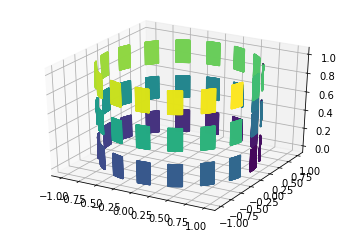

In [14]:
# Visualize the electrodes

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

x_values = []
y_values = []
z_values = []
l_values = []

for z_range in z_limits:
    z0 = z_range[0]
    z1 = z_range[1]
    
    for z in np.linspace(z0, z1, 50):
        for angle_range in theta_limits:
            phi0 = angle_range[0]
            phi1 = angle_range[1]
            for theta in np.linspace(phi0, phi1 , 100):
                x = np.cos(theta)
                y = np.sin(theta)
                l = which_electrode(x,y,z)
                x_values.append(x)
                y_values.append(y)
                z_values.append(z)
                l_values.append(l)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
cax = ax.scatter(x_values, y_values, z_values, c=l_values, s=0.5, alpha=0.8, marker='o')

plt.show()
        
    


To conclude this section, we solve the EIT boundary conditions on this cylinder:

$$ \mathbf{n} \cdot \nabla u(x) = 0, \quad x \in \partial Q \setminus \bigcup_{l=1}^m E_l  $$

$$ u(x) + Z_l \thinspace \mathbf{n} \cdot \nabla u(x) = U_l, \quad x \in E_l $$


In [28]:
from dolfin import *
from mshr import *

#Making a cylindrical geometry
cylinder = Cylinder(Point(0, 0, 0), Point(0, 0, 1), 1, 1)
geometry = cylinder

# Making Mesh (40 corresponds to the mesh density)
mesh = generate_mesh(geometry, 40)

U=[] # electrode voltages
Z=[] # electrode impedances
for i in range(len(theta_limits)*len(z_limits)):
    U.append((-1)**i)
    Z.append(1)
    
boundary_markers = MeshFunction('size_t', mesh, 2)

class BoundaryE0(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==0) and is_electrode(x[0], x[1], x[2])

class BoundaryE1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==1)  and is_electrode(x[0], x[1], x[2])
    
class BoundaryE2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==2)  and is_electrode(x[0], x[1], x[2])

class BoundaryE3(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==3) and is_electrode(x[0], x[1], x[2])

class BoundaryE4(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==4) and is_electrode(x[0], x[1], x[2])

class BoundaryE5(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==5)  and is_electrode(x[0], x[1], x[2])

class BoundaryE6(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==6) and is_electrode(x[0], x[1], x[2])

class BoundaryE7(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==7) and is_electrode(x[0], x[1], x[2])

class BoundaryE8(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==8) and is_electrode(x[0], x[1], x[2])

class BoundaryE9(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==9) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE10(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==10) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE11(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==11) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE12(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==12) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE13(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==13) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE14(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==14) and is_electrode(x[0], x[1], x[2])

class BoundaryE15(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==15) and is_electrode(x[0], x[1], x[2])

class BoundaryE16(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==16) and is_electrode(x[0], x[1], x[2])

class BoundaryE17(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==17)  and is_electrode(x[0], x[1], x[2])
    
class BoundaryE18(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==18)  and is_electrode(x[0], x[1], x[2])

class BoundaryE19(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==19) and is_electrode(x[0], x[1], x[2])

class BoundaryE20(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==20) and is_electrode(x[0], x[1], x[2])

class BoundaryE21(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==21)  and is_electrode(x[0], x[1], x[2])

class BoundaryE22(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==22) and is_electrode(x[0], x[1], x[2])

class BoundaryE23(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==23) and is_electrode(x[0], x[1], x[2])

class BoundaryE24(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==24) and is_electrode(x[0], x[1], x[2])

class BoundaryE25(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==25) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE26(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==26) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE27(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==27) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE28(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==28) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE29(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==29) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE30(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==30) and is_electrode(x[0], x[1], x[2])

class BoundaryE31(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==31) and is_electrode(x[0], x[1], x[2])

class BoundaryE32(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==32) and is_electrode(x[0], x[1], x[2])

class BoundaryE33(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==33)  and is_electrode(x[0], x[1], x[2])
    
class BoundaryE34(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==34)  and is_electrode(x[0], x[1], x[2])

class BoundaryE35(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==35) and is_electrode(x[0], x[1], x[2])

class BoundaryE36(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==36) and is_electrode(x[0], x[1], x[2])

class BoundaryE37(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==37)  and is_electrode(x[0], x[1], x[2])

class BoundaryE38(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==38) and is_electrode(x[0], x[1], x[2])

class BoundaryE39(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==39) and is_electrode(x[0], x[1], x[2])

class BoundaryE40(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==40) and is_electrode(x[0], x[1], x[2])

class BoundaryE41(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==41) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE42(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==42) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE43(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==43) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE44(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==44) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE45(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==45) and is_electrode(x[0], x[1], x[2])
    
class BoundaryE46(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==46) and is_electrode(x[0], x[1], x[2])

class BoundaryE47(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1], x[2])==47) and is_electrode(x[0], x[1], x[2])


be0 = BoundaryE0()
be1 = BoundaryE1()
be2 = BoundaryE2()
be3 = BoundaryE3()
be4 = BoundaryE4()
be5 = BoundaryE5()
be6 = BoundaryE6()
be7 = BoundaryE7()
be8 = BoundaryE8()
be9 = BoundaryE9()
be10 = BoundaryE10()
be11 = BoundaryE11()
be12 = BoundaryE12()
be13 = BoundaryE13()
be14 = BoundaryE14()
be15 = BoundaryE15()
be16 = BoundaryE16()
be17 = BoundaryE17()
be18 = BoundaryE18()
be19 = BoundaryE19()
be20 = BoundaryE20()
be21 = BoundaryE21()
be22 = BoundaryE22()
be23 = BoundaryE23()
be24 = BoundaryE24()
be25 = BoundaryE25()
be26 = BoundaryE26()
be27 = BoundaryE27()
be28 = BoundaryE28()
be29 = BoundaryE29()
be30 = BoundaryE30()
be31 = BoundaryE31()
be32 = BoundaryE32()
be33 = BoundaryE33()
be34 = BoundaryE34()
be35 = BoundaryE35()
be36 = BoundaryE36()
be37 = BoundaryE37()
be38 = BoundaryE38()
be39 = BoundaryE39()
be40 = BoundaryE40()
be41 = BoundaryE41()
be42 = BoundaryE42()
be43 = BoundaryE43()
be44 = BoundaryE44()
be45 = BoundaryE45()
be46 = BoundaryE46()
be47 = BoundaryE47()


be0.mark(boundary_markers, 0)
be1.mark(boundary_markers, 1)
be2.mark(boundary_markers, 2)
be3.mark(boundary_markers, 3)
be4.mark(boundary_markers, 4)
be5.mark(boundary_markers, 5)
be6.mark(boundary_markers, 6)
be7.mark(boundary_markers, 7)
be8.mark(boundary_markers, 8)
be9.mark(boundary_markers, 9)
be10.mark(boundary_markers, 10)
be11.mark(boundary_markers, 11)
be12.mark(boundary_markers, 12)
be13.mark(boundary_markers, 13)
be14.mark(boundary_markers, 14)
be15.mark(boundary_markers, 15)
be16.mark(boundary_markers, 16)
be17.mark(boundary_markers, 17)
be18.mark(boundary_markers, 18)
be19.mark(boundary_markers, 19)
be20.mark(boundary_markers, 20)
be21.mark(boundary_markers, 21)
be22.mark(boundary_markers, 22)
be23.mark(boundary_markers, 23)
be24.mark(boundary_markers, 24)
be25.mark(boundary_markers, 25)
be26.mark(boundary_markers, 26)
be27.mark(boundary_markers, 27)
be28.mark(boundary_markers, 28)
be29.mark(boundary_markers, 29)
be30.mark(boundary_markers, 30)
be31.mark(boundary_markers, 31)
be32.mark(boundary_markers, 32)
be33.mark(boundary_markers, 33)
be34.mark(boundary_markers, 34)
be35.mark(boundary_markers, 35)
be36.mark(boundary_markers, 36)
be37.mark(boundary_markers, 37)
be38.mark(boundary_markers, 38)
be39.mark(boundary_markers, 39)
be40.mark(boundary_markers, 40)
be41.mark(boundary_markers, 41)
be42.mark(boundary_markers, 42)
be43.mark(boundary_markers, 43)
be44.mark(boundary_markers, 44)
be45.mark(boundary_markers, 45)
be46.mark(boundary_markers, 46)
be47.mark(boundary_markers, 47)



ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

In [ ]:
import matplotlib.pyplot as plt

V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)

a = inner(nabla_grad(u), nabla_grad(v))*dx
L =  0

for i in range(len(theta_limits)*len(z_limits)):
    a = a + u*v*ds(i)
    L = L + v*(U[i])*ds(i)


u = Function(V)
solve(a==L, u)


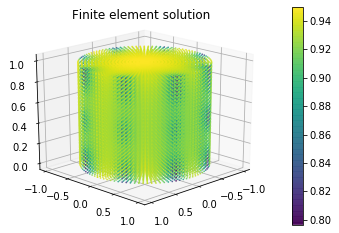

In [31]:
# Visualize the solution using matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

theta_list = np.linspace(0, 2*np.pi, 100)
r_list = np.linspace(0.01, 0.99, 20)
z_list = np.linspace(0.01, 0.99, 30)

x_values = []
y_values = []
z_values = []

for z in z_list:
    for r in r_list:
        for theta in theta_list:
            x_values.append(r*np.cos(theta))
            y_values.append(r*np.sin(theta))
            z_values.append(z)
            
u.set_allow_extrapolation(True)
us = []

for i in range(len(x_values)):
    us.append(u(x_values[i], y_values[i], z_values[i]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=us, cmap='viridis', s=0.5, alpha=0.8, marker='o')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Finite element solution")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()


## Poisson equation with inhomogeneous conductivity

We will now move on to the more general case where the conductivity varies across the domain:

$$ -\nabla \cdot ( \sigma(x) \nabla u(x)) = f(x).$$

We will work in the already considered geometries and boundary conditions and model the cancerous tissue as balls of higher conductivity. We smooth out the bump functions as $\xi_r(x) = \tilde{\xi}_r^\varepsilon(x)$ with 

$$ \xi_r(x) = \left\{ \begin{array}{lcc} 1 & \text{if} & |x|^2 < r^2 \\ \\ 0 & \text{if} & |x|^2 \geq r^2  \end{array} \right. $$

$$\tilde{\xi}_r^{\varepsilon}(x) = \exp{\frac{\varepsilon}{\left(\frac{|x|}{r}\right)^2 - 1}} \rightarrow \xi_r(x) \quad \text{as} \quad \varepsilon \rightarrow 0 $$



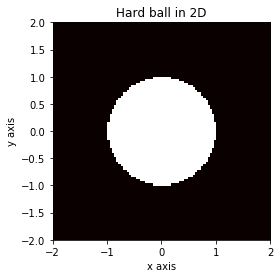

In [36]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.linspace(-2,2,100)
y_values = np.linspace(-2,2,100)

X, Y = np.meshgrid(x_values, y_values)

def hard_step(x,y):
    if x**2 + y**2 < 1:
        return 1
    else:
        return 0
    
hard_step = np.vectorize(hard_step)
Z = hard_step(X, Y)

plt.imshow(Z, extent=(-2,2,-2,2), origin='lower', cmap='hot')
plt.title("Hard ball in 2D")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()


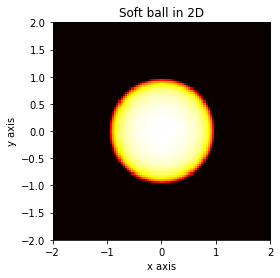

In [43]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.1

x_values = np.linspace(-2,2,100)
y_values = np.linspace(-2,2,100)

X, Y = np.meshgrid(x_values, y_values)

def soft_step(x,y):
    if x**2 + y**2 < 1:
        return np.exp(epsilon/(x**2 + y**2 - 1.0))
    else:
        return 0.0
    
soft_step = np.vectorize(soft_step)
Z = soft_step(X, Y)

plt.imshow(Z, extent=(-2,2,-2,2), origin='lower', cmap='hot')
plt.title("Soft ball in 2D")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.show()

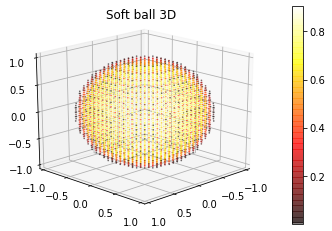

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

epsilon = 0.1

x_grid = np.linspace(-2,2,50)
y_grid = np.linspace(-2,2, 50)
z_grid = np.linspace(-2,2, 50)

x_values = []
y_values = []
z_values = []
xi_values = []



def soft_ball3D(x,y,z):
    if x**2 + y**2 + z**2 < 1:
        return np.exp(epsilon/(x**2 + y**2 + z**2 - 1))
    else:
        return 0
for z in z_grid:
    for y in y_grid:
        for x in x_grid:
            xi = soft_ball3D(x, y, z)
            if xi>0.0:
                x_values.append(x)
                y_values.append(y)
                z_values.append(z)
                xi_values.append(xi)
            else:
                continue
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Scatter plot with color determined by u_exact
cax = ax.scatter(x_values, y_values, z_values, c=xi_values, s=0.5, alpha=0.5, marker='o', cmap='hot')

cbar = fig.colorbar(cax)  # Add a color bar

ax.set_title("Soft ball 3D")

# Set the viewing angle
ax.view_init(elev=20, azim=45)

plt.show()

            
            



Text(0.5, 1.0, 'Dirichlet BCs')

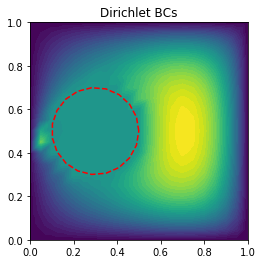

In [43]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np

# Define tumor

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.3
cy = 0.5
r=0.2
sigma_in = 100
sigma_out = 1

# Create mesh and define function space
mesh = UnitSquareMesh(20, 20)
V = FunctionSpace(mesh, "Lagrange", 2)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("0", degree=2)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
#sigma = Expression("(x[0]*x[0] + x[1]*x[1] < 1.0) * exp(0.3/((x[0]*x[0] + x[1]*x[1]) - 1)) + 1", degree=2)
sigma = Expression(sigma2D(cx, cy, r, sigma_in, sigma_out), degree=2)
f = Expression("x[0]", degree=2)  # driving term

a = inner(nabla_grad(u), nabla_grad(v))*sigma*dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)


x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(0.3 + 0.2*np.cos(phi))
    y_values.append(0.5 + 0.2*np.sin(phi))


p = plot(u)
plt.plot(x_values, y_values, linestyle='dashed', c='r')
plt.title("Dirichlet BCs")

# Observe that the solver actually works better for hard spheres. This may have to do with Fenics not
# handling diverging values adequately,so work with hard spheres for now


In [44]:
from dolfin import *
import matplotlib.pyplot as plt

# Define tumor

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.3
cy = 0.5
r=0.2
sigma_in = 100
sigma_out = 1

# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("0", degree=2)  # driving term
h = Expression("-x[0]*x[1]", degree=2)
Gamma = Expression("x[0]", degree=1)
sigma = Expression(sigma2D(cx, cy, r, sigma_in, sigma_out), degree=2)

a = inner(nabla_grad(u), nabla_grad(v)) * sigma * dx + Gamma * u * v * sigma * ds
L = f*v*dx + h*v*sigma*ds

u = Function(V)
solve(a==L, u)

Text(0.5, 1.0, 'Robin BCs')

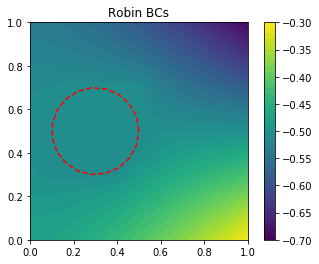

In [45]:
x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(0.3 + 0.2*np.cos(phi))
    y_values.append(0.5 + 0.2*np.sin(phi))

p = plot(u)
plt.colorbar(p)
plt.plot(x_values, y_values, linestyle='dashed', c='r')
plt.title("Robin BCs")

Text(0.5, 1.0, 'Neumann BCs + integral constraint')

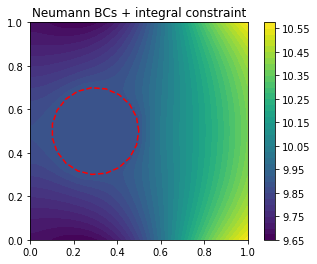

In [46]:
from dolfin import *
import matplotlib.pyplot as plt

# Define tumor

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.3
cy = 0.5
r=0.2
sigma_in = 100
sigma_out = 1

# Create mesh
mesh = UnitSquareMesh(64, 64)

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("-sin(5*x[0])", degree=2)
mu = Constant(10.0)
sigma = Expression(sigma2D(cx, cy, r, sigma_in, sigma_out), degree=2)
a = (inner(grad(u), grad(v))*sigma + c*v + (u*d))*dx
L = f*v*dx + g*v*sigma*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()
u = u + mu

x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(0.3 + 0.2*np.cos(phi))
    y_values.append(0.5 + 0.2*np.sin(phi))

p = plot(u)
plt.plot(x_values, y_values, linestyle='dashed', c='r')
plt.colorbar(p)
plt.title("Neumann BCs + integral constraint")

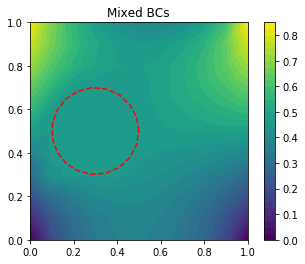

In [49]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.3
cy = 0.5
r=0.2
sigma_in = 100
sigma_out = 1

# Create mesh and define function space
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
h = Expression("-sin(x[0]*x[1])", degree=2)
Gamma = Expression("x[0]*x[1]", degree=1)
sigma = Expression(sigma2D(cx, cy, r, sigma_in, sigma_out), degree=2)

def u0_boundary(x, on_boundary):
    return on_boundary and (x[0]==1.0 or x[0]==0.0 )

u0 = Expression("sin(x[1])", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs

a = inner(nabla_grad(u), nabla_grad(v))*sigma*dx + Gamma * u * v * sigma * ds
L = f*v*dx + h*v*sigma*ds

u = Function(V)
solve(a==L, u, bc)

x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(0.3 + 0.2*np.cos(phi))
    y_values.append(0.5 + 0.2*np.sin(phi))

p = plot(u)
plt.colorbar(p)
plt.plot(x_values, y_values, linestyle='dashed', c='r')
plt.title("Mixed BCs")
plt.show()

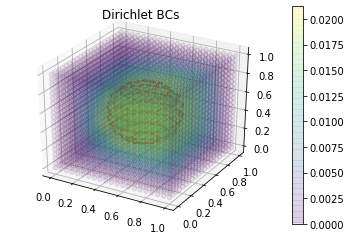

In [28]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def sigma3D(cx, cy, cz, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 + "
            + 2*("(x[2] -  " + str(cz) + ")*") + "1 < "  + str(r**2)   + ") + " + str(sigma_out)  )

cx = 0.5
cy = 0.5
cz = 0.5
r = 0.3
sigma_in = 1000
sigma_out = 1

# Create mesh and define function space
mesh = UnitCubeMesh(20, 20, 20)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("0", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("x[0]", degree=2)  # driving term
sigma = Expression(sigma3D(cx, cy, cz, r, sigma_in, sigma_out), degree=2)

a = inner(nabla_grad(u), nabla_grad(v))* sigma * dx
L = f*v*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = plot(u, alpha=0.1)
plt.colorbar(p)
plt.title("Dirichlet BCs")

theta_values = np.linspace(0, np.pi, 10)
phi_values = np.linspace(0, 2*np.pi, 10)
for theta in theta_values:
    x_values = []
    y_values = []
    z_values = []
    for phi in phi_values:
        x_values.append(cx + r*np.sin(theta)*np.cos(phi))
        y_values.append(cy + r*np.sin(theta)*np.sin(phi))
        z_values.append(cz + r*np.cos(theta))
        ax.plot(x_values, y_values, z_values, linestyle='dashed', c='r')

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

u = np.vectorize(u)


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    x_values = []
    y_values = []
    phi_values = np.linspace(0, 2*np.pi, 20)    
    theta = np.arccos((z_value - cz)/r)
    for phi in phi_values:
        x_values.append(cx + r*np.sin(theta)*np.cos(phi))
        y_values.append(cy + r*np.sin(theta)*np.sin(phi))
    
    
    
    plt.figure(figsize=(8, 4))
    plt.imshow(u(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.plot(x_values, y_values, linestyle='dashed', c='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Dirichlet BCs')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

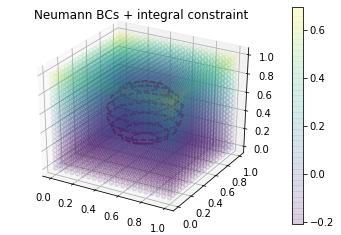

In [30]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def sigma3D(cx, cy, cz, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 + "
            + 2*("(x[2] -  " + str(cz) + ")*") + "1 < "  + str(r**2)   + ") + " + str(sigma_out)  )

cx = 0.5
cy = 0.5
cz = 0.5
r = 0.3
sigma_in = 1000
sigma_out = 1

# Create mesh
mesh = UnitCubeMesh(20, 20, 20)

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)
V = FunctionSpace(mesh, P1)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression(" x[1]",
               degree=1)
sigma = Expression(sigma3D(cx, cy, cz, r, sigma_in, sigma_out), degree=2)

g = Expression("x[2]", degree=2)
a = (inner(grad(u), grad(v))*sigma + c*v + (u*d))*dx
L = f*v*dx + g*v*sigma*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = plot(u, alpha=0.1)
plt.colorbar(p)
plt.title("Neumann BCs + integral constraint")

theta_values = np.linspace(0, np.pi, 10)
phi_values = np.linspace(0, 2*np.pi, 10)

for theta in theta_values:
    x_values = []
    y_values = []
    z_values = []
    for phi in phi_values:
        x_values.append(cx + r*np.sin(theta)*np.cos(phi))
        y_values.append(cy + r*np.sin(theta)*np.sin(phi))
        z_values.append(cz + r*np.cos(theta))
        ax.plot(x_values, y_values, z_values, linestyle='dashed', c='r')


        




In [31]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

u = np.vectorize(u)


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    x_values = []
    y_values = []
    phi_values = np.linspace(0, 2*np.pi, 20)    
    theta = np.arccos((z_value - cz)/r)
    for phi in phi_values:
        x_values.append(cx + r*np.sin(theta)*np.cos(phi))
        y_values.append(cy + r*np.sin(theta)*np.sin(phi))
    
    
    
    plt.figure(figsize=(8, 4))
    plt.imshow(u(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.plot(x_values, y_values, linestyle='dashed', c='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Neumann BCs + integral constraint')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

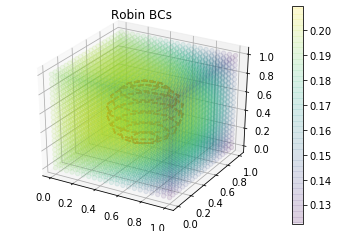

In [2]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def sigma3D(cx, cy, cz, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 + "
            + 2*("(x[2] -  " + str(cz) + ")*") + "1 < "  + str(r**2)   + ") + " + str(sigma_out)  )

cx = 0.5
cy = 0.5
cz = 0.5
r = 0.3
sigma_in = 1000
sigma_out = 1

# Create mesh and define function space
mesh = UnitCubeMesh(20, 20, 20)
V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("x[0]", degree=2)  # driving term
h = Expression("0", degree=0)
Gamma = Expression("x[0]", degree=1)
sigma = Expression(sigma3D(cx, cy, cz, r, sigma_in, sigma_out), degree=2)

a = inner(nabla_grad(u), nabla_grad(v))* sigma * dx + sigma * Gamma * u * v * ds
L = f*v*dx + sigma*h*v*ds
# Compute solution
u = Function(V) 
solve(a == L, u)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
p = plot(u, alpha=0.1)
plt.colorbar(p)
plt.title("Robin BCs")

theta_values = np.linspace(0, np.pi, 10)
phi_values = np.linspace(0, 2*np.pi, 10)
for theta in theta_values:
    x_values = []
    y_values = []
    z_values = []
    for phi in phi_values:
        x_values.append(cx + r*np.sin(theta)*np.cos(phi))
        y_values.append(cy + r*np.sin(theta)*np.sin(phi))
        z_values.append(cz + r*np.cos(theta))
        ax.plot(x_values, y_values, z_values, linestyle='dashed', c='r')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

u = np.vectorize(u)


def interactive_plot(z_value):
    x = np.linspace(0, 1, 50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x, y)
    x_values = []
    y_values = []
    phi_values = np.linspace(0, 2*np.pi, 20)    
    theta = np.arccos((z_value - cz)/r)
    for phi in phi_values:
        x_values.append(cx + r*np.sin(theta)*np.cos(phi))
        y_values.append(cy + r*np.sin(theta)*np.sin(phi))
    
    
    
    plt.figure(figsize=(8, 4))
    plt.imshow(u(X, Y, z_value), extent=(0,1,0,1), origin='lower')
    plt.plot(x_values, y_values, linestyle='dashed', c='r')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Robin BCs')
    plt.colorbar()
    plt.show()


interact(interactive_plot, z_value=(0, 1, 0.1))

interactive(children=(FloatSlider(value=0.0, description='z_value', max=1.0), Output()), _dom_classes=('widget…

<function __main__.interactive_plot(z_value)>

Text(0.5, 1.0, 'Dirichlet BCs')

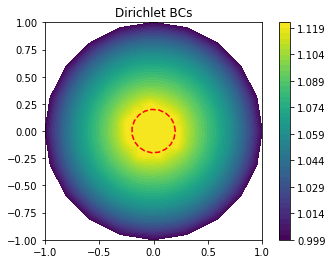

In [8]:
from dolfin import *
from scipy.special import sici
import mshr
import numpy as np
import matplotlib.pyplot as plt

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.0
cy = 0.0
r=0.2
sigma_in = 100
sigma_out = 1

domain = mshr.Circle(Point(0.,0.),1.0,20)
mesh = mshr.generate_mesh(domain, 20)

V = FunctionSpace(mesh, "Lagrange", 1)

# Define boundary conditions

def u0_boundary(x, on_boundary):
    return on_boundary

u0 = Expression("1", degree=0)
bc = DirichletBC(V, u0, u0_boundary) # Dirichlet BCs


# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
sigma = Expression(sigma2D(cx,cy,r,sigma_in, sigma_out), degree=1)

a = inner(nabla_grad(u), nabla_grad(v))*sigma*dx
L = f*v*sigma*dx 
# Compute solution
u = Function(V) 
solve(a == L, u, bc)

x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(cx + r*np.cos(phi))
    y_values.append(cy + r*np.sin(phi))

p=plot(u)
plt.colorbar(p)
plt.plot(x_values, y_values, ls='dashed', c='r')
plt.title("Dirichlet BCs")

Text(0.5, 1.0, 'Robin BCs')

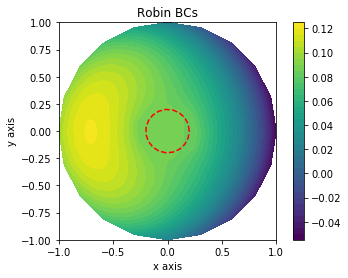

In [13]:
from dolfin import *
#from scipy.special import sici
import mshr
import numpy as np
import matplotlib.pyplot as plt

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.0
cy = 0.0
r=0.2
sigma_in = 100
sigma_out = 1

domain = mshr.Circle(Point(0.,0.),1.0,20)
mesh = mshr.generate_mesh(domain, 20)

V = FunctionSpace(mesh, "Lagrange", 1)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("pow(x[0],2) + x[1]*x[1]", degree=2)  # driving term
h = Expression("-sin(x[0])", degree=2)
Gamma = Expression("10", degree=1)
sigma = Expression(sigma2D(cx, cy, r, sigma_in, sigma_out), degree=1)

a = inner(nabla_grad(u), nabla_grad(v))*sigma*dx + Gamma * u * sigma * v * ds
L = f*v*dx + h*v*sigma*ds

u = Function(V)
solve(a==L, u)

x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(cx + r*np.cos(phi))
    y_values.append(cy + r*np.sin(phi))

p = plot(u)
plt.colorbar(p)
plt.plot(x_values, y_values, ls='dashed', c='r')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Robin BCs")

Integral =  -1.9439744952665095e-16


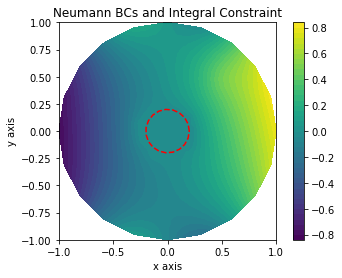

In [16]:
# Pure Neumann BCs with integral constraint

from dolfin import *
import mshr
import numpy as np
import matplotlib.pyplot as plt

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.0
cy = 0.0
r=0.2
sigma_in = 1000
sigma_out = 1

domain = mshr.Circle(Point(0.,0.),1.0,20)
mesh = mshr.generate_mesh(domain, 20)

# Build function space with Lagrange multiplier
P1 = FiniteElement("Lagrange", mesh.ufl_cell(), 1)
R = FiniteElement("Real", mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, P1 * R)

# Define variational problem
(u, c) = TrialFunction(W)
(v, d) = TestFunctions(W)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("-sin(5*x[0])", degree=2)
sigma = Expression(sigma2D(cx,cy,r,sigma_in,sigma_out), degree=1)

a = (inner(grad(u), grad(v)) * sigma + c*v + (u*d))*dx
L = f*v*dx + g*v*sigma*ds

# Compute solution
w = Function(W)
solve(a == L, w)
(u, c) = w.split()

x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(cx + r*np.cos(phi))
    y_values.append(cy + r*np.sin(phi))

p = plot(u)
plt.colorbar(p)
plt.plot(x_values, y_values, ls='dashed', c='r')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Neumann BCs and Integral Constraint")
print('Integral = ', assemble(u*dx))

In [35]:
import numpy as np

tolerance = 0.002
num_electrodes = 16

alpha = 1.2*np.pi/num_electrodes
beta = 0.8*np.pi/num_electrodes

def cylindrical(x,y):
    r = np.sqrt(x**2 + y**2)
    if x>=0 and y>=0:
        theta = np.arccos(x/r)
    elif x<0 and y>=0:
        theta = np.arccos(x/r)
    elif x<0 and y<0:
        theta = np.pi - np.arcsin(y/r)
    elif x>=0 and y<0:
        theta = 2 * np.pi + np.arcsin(y/r)
        
    return r, theta


theta_limits = []
phi0 = 0

while phi0 < 2*np.pi:
    phi1 = phi0 + alpha
    theta_limits.append([phi0, phi1])
    phi0 = phi1 + beta

    
def is_electrode(x,y):
    r, theta = cylindrical(x,y)
    result = False
    if np.abs(r-0.1) < tolerance:
        for electrode in theta_limits:
            phi0 = electrode[0]
            phi1 = electrode[1]
            
            if theta >= phi0 and theta <= phi1:
                result = True
                break
                
    return result
    
def which_electrode(x,y):
    m = len(theta_limits)
    
    r, theta = cylindrical(x,y)
    
    if is_electrode(x,y):
        l=0
        for j in range(len(theta_limits)):
            phi0 = theta_limits[j][0]
            phi1 = theta_limits[j][1]
            
            if theta >= phi0 and theta <= phi1:
                l = l+j
        return l
    else:
        return -5
                

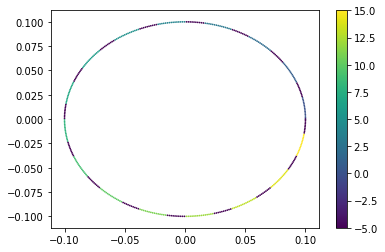

In [37]:
# Visualize the electrodes

import numpy as np
import matplotlib.pyplot as plt

x_values = []
y_values = []
l_values = []

for angle in np.linspace(0, 2*np.pi, 400):
    x_values.append(0.1 * np.cos(angle))
    y_values.append(0.1 * np.sin(angle))
    l_values.append(which_electrode(0.1*np.cos(angle), 0.1*np.sin(angle)))
    
                
plt.scatter(x_values, y_values, c=l_values, s=0.5, marker='o')
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'EIT with 16 electrodes')

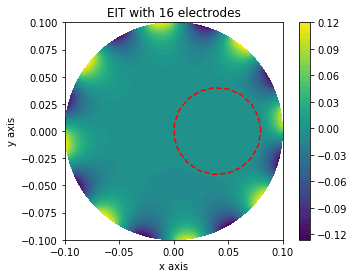

In [40]:
from dolfin import *
import mshr
import numpy as np
import matplotlib.pyplot as plt

def sigma2D(cx, cy, r, sigma_in, sigma_out):
    return (str(sigma_in-sigma_out) + "*(" + 2* ("(x[0] - " + str(cx) + ") *") + "1 +" 
            + 2* ("(x[1] - " + str(cy) + ")*") + "1 < " + str(r**2)   + ") + " + str(sigma_out)  )
cx = 0.04
cy = 0.0
r=0.04
sigma_in = 1000
sigma_out = 1

domain = mshr.Circle(Point(0.,0.),0.1,100)
mesh = mshr.generate_mesh(domain, 100)

U=[] # electrode voltages
Z=[] # electrode impedances
for i in range(len(theta_limits)):
    U.append((-1)**i)
    Z.append(0.1)
    
boundary_markers = MeshFunction('size_t', mesh, 1)

class BoundaryE0(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==0) and is_electrode(x[0], x[1])

class BoundaryE1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==1)  and is_electrode(x[0], x[1])
    
class BoundaryE2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==2)  and is_electrode(x[0], x[1])

class BoundaryE3(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==3) and is_electrode(x[0], x[1])

class BoundaryE4(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==4) and is_electrode(x[0], x[1])

class BoundaryE5(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==5)  and is_electrode(x[0], x[1])

class BoundaryE6(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==6) and is_electrode(x[0], x[1])

class BoundaryE7(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==7) and is_electrode(x[0], x[1])

class BoundaryE8(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==8) and is_electrode(x[0], x[1])

class BoundaryE9(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==9) and is_electrode(x[0], x[1])
    
class BoundaryE10(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==10) and is_electrode(x[0], x[1])
    
class BoundaryE11(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==11) and is_electrode(x[0], x[1])
    
class BoundaryE12(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==12) and is_electrode(x[0], x[1])
    
class BoundaryE13(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==13) and is_electrode(x[0], x[1])
    
class BoundaryE14(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==14) and is_electrode(x[0], x[1])

class BoundaryE15(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==15) and is_electrode(x[0], x[1])

be0 = BoundaryE0()
be1 = BoundaryE1()
be2 = BoundaryE2()
be3 = BoundaryE3()
be4 = BoundaryE4()
be5 = BoundaryE5()
be6 = BoundaryE6()
be7 = BoundaryE7()
be8 = BoundaryE8()
be9 = BoundaryE9()
be10 = BoundaryE10()
be11 = BoundaryE11()
be12 = BoundaryE12()
be13 = BoundaryE13()
be14 = BoundaryE14()
be15 = BoundaryE15()

be0.mark(boundary_markers, 1)
be1.mark(boundary_markers, 2)
be2.mark(boundary_markers, 3)
be3.mark(boundary_markers, 4)
be4.mark(boundary_markers, 5)
be5.mark(boundary_markers, 6)
be6.mark(boundary_markers, 7)
be7.mark(boundary_markers, 8)
be8.mark(boundary_markers, 9)
be9.mark(boundary_markers, 10)
be10.mark(boundary_markers, 11)
be11.mark(boundary_markers, 12)
be12.mark(boundary_markers, 13)
be13.mark(boundary_markers, 14)
be14.mark(boundary_markers, 15)
be15.mark(boundary_markers, 16)


ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

V = FunctionSpace(mesh, "Lagrange",2)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
sigma = Expression(sigma2D(cx,cy,r,sigma_in, sigma_out), degree=2)

a = inner(nabla_grad(u), nabla_grad(v))*sigma*dx
L =  0

for i in range(16):
    a = a + u*v*(1/Z[i])*ds(i + 1)
    L = L + v*(U[i]/Z[i])*ds(i + 1)


u = Function(V)
solve(a==L, u)

x_values = []
y_values = []
phi_values = np.linspace(0,2*np.pi, 20)

for phi in phi_values:
    x_values.append(cx + r*np.cos(phi))
    y_values.append(cy + r*np.sin(phi))

p = plot(u)
plt.colorbar(p)
plt.plot(x_values, y_values, ls='dashed', c='r')
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.title("EIT with 16 electrodes")

## Fitting the true electrode voltages

The first stage of the inverse problem is to reconstruct the electrode voltage vector $U = (U_l)_{l=1}^m$ corresponding to a fixed conductivity $\sigma: Q \rightarrow \mathbb{R}$, electrode impedance vector $Z = (Z_l)_{l=1}^m$ and current pattern $I = (I_l)_{l=1}^m$. We do this by minimizing the functional

$$ \mathcal{J}(U) =  \sum_{l=1}^m \left( \int_{E_l} \frac{U_l - u(x)}{Z_l}ds - I_l \right)^2 $$

in the control set 

$$ W = \{ U \in \mathbb{R}^m | \sum_{l=1}^m U_l = 0 \} $$

In [270]:
## Start with the 2D case, try to reproduce results in paper.
## Optimize the code later

from dolfin import *
import mshr
import numpy as np
import matplotlib.pyplot as plt

tolerance = 0.005
num_electrodes = 16

alpha = 1.2*np.pi/num_electrodes
beta = 0.8*np.pi/num_electrodes

def cylindrical(x,y):
    r = np.sqrt(x**2 + y**2)
    if x>=0 and y>=0:
        theta = np.arccos(x/r)
    elif x<0 and y>=0:
        theta = np.arccos(x/r)
    elif x<0 and y<0:
        theta = np.pi - np.arcsin(y/r)
    elif x>=0 and y<0:
        theta = 2 * np.pi + np.arcsin(y/r)
        
    return r, theta


theta_limits = []
phi0 = 0

while phi0 < 2*np.pi:
    phi1 = phi0 + alpha
    theta_limits.append([phi0, phi1])
    phi0 = phi1 + beta

    
def is_electrode(x,y):
    r, theta = cylindrical(x,y)
    result = False
    if np.abs(r-0.1) < tolerance:
        for electrode in theta_limits:
            phi0 = electrode[0]
            phi1 = electrode[1]
            
            if theta >= phi0 and theta <= phi1:
                result = True
                break
                
    return result
    
def which_electrode(x,y):
    m = len(theta_limits)
    
    r, theta = cylindrical(x,y)
    
    if is_electrode(x,y):
        l=0
        for j in range(len(theta_limits)):
            phi0 = theta_limits[j][0]
            phi1 = theta_limits[j][1]
            
            if theta >= phi0 and theta <= phi1:
                l = l+j
        return l
    else:
        return -1
                


domain = mshr.Circle(Point(0.,0.),0.1,100)
mesh = mshr.generate_mesh(domain, 100)

U=[] # electrode voltages
Z=[] # electrode impedances
I = [-3, 2, 3, -7, 6, -1, -4, 2, 4, 3, -5, 4, 3, -5, 2, -4] # Current pattern

for i in range(len(theta_limits)):
    U.append(-0.1*(-1)**i)
    Z.append(0.1)
    I[i] = I[i]/100
    
sigma_true = str("0.2 + 0.2 * ((pow(x[0],2) + pow(x[1]-0.05,2) < pow(0.03,2)) +"
                 + "(pow(x[0] + 0.075,2) + pow(x[1]+0.01,2) < pow(0.0063,2)) +"
                 + "(pow(x[0] + 0.015,2) + pow(x[1]+0.02,2) < pow(0.0122,2)) +"
                 + "(pow(x[0] - 0.025,2) + pow(x[1]+0.055,2) < pow(0.0235,2))) ")
    
    
boundary_markers = MeshFunction('size_t', mesh, 1)

class BoundaryE0(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==0) and is_electrode(x[0], x[1])

class BoundaryE1(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==1)  and is_electrode(x[0], x[1])
    
class BoundaryE2(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==2)  and is_electrode(x[0], x[1])

class BoundaryE3(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==3) and is_electrode(x[0], x[1])

class BoundaryE4(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==4) and is_electrode(x[0], x[1])

class BoundaryE5(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==5)  and is_electrode(x[0], x[1])

class BoundaryE6(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==6) and is_electrode(x[0], x[1])

class BoundaryE7(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==7) and is_electrode(x[0], x[1])

class BoundaryE8(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==8) and is_electrode(x[0], x[1])

class BoundaryE9(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==9) and is_electrode(x[0], x[1])
    
class BoundaryE10(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==10) and is_electrode(x[0], x[1])
    
class BoundaryE11(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==11) and is_electrode(x[0], x[1])
    
class BoundaryE12(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==12) and is_electrode(x[0], x[1])
    
class BoundaryE13(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==13) and is_electrode(x[0], x[1])
    
class BoundaryE14(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==14) and is_electrode(x[0], x[1])

class BoundaryE15(SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and (which_electrode(x[0],x[1])==15) and is_electrode(x[0], x[1])

be0 = BoundaryE0()
be1 = BoundaryE1()
be2 = BoundaryE2()
be3 = BoundaryE3()
be4 = BoundaryE4()
be5 = BoundaryE5()
be6 = BoundaryE6()
be7 = BoundaryE7()
be8 = BoundaryE8()
be9 = BoundaryE9()
be10 = BoundaryE10()
be11 = BoundaryE11()
be12 = BoundaryE12()
be13 = BoundaryE13()
be14 = BoundaryE14()
be15 = BoundaryE15()

be0.mark(boundary_markers, 1)
be1.mark(boundary_markers, 2)
be2.mark(boundary_markers, 3)
be3.mark(boundary_markers, 4)
be4.mark(boundary_markers, 5)
be5.mark(boundary_markers, 6)
be6.mark(boundary_markers, 7)
be7.mark(boundary_markers, 8)
be8.mark(boundary_markers, 9)
be9.mark(boundary_markers, 10)
be10.mark(boundary_markers, 11)
be11.mark(boundary_markers, 12)
be12.mark(boundary_markers, 13)
be13.mark(boundary_markers, 14)
be14.mark(boundary_markers, 15)
be15.mark(boundary_markers, 16)


ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)

V = FunctionSpace(mesh, "Lagrange", 1)



In [260]:
plot(sigma)


RuntimeError: Expecting a mesh as keyword argument

In [271]:
def J(solution, U_arg):
    result = 0.0
    for l in range(num_electrodes):
        result += ((1/Z[l])*assemble((Constant(U_arg[l])-solution)*ds(l+1)) - I[l] )**2
    return result

def potential(sigma, I, U_arg):
    
    u = TrialFunction(V)
    v = TestFunction(V)
    
    a = inner(nabla_grad(u), nabla_grad(v))*sigma*dx
    L = 0
    
    for i in range(num_electrodes):
        a = a + u*v*(1/Z[i])*ds(i+1)
        L = L + v*(U_arg[i]/Z[i])*ds(i+1)

    u = Function(V)
    solve(a==L, u)
    
    return u

def adjoint(sigma, I, U_arg, u_arg):
    psi = TrialFunction(V)
    v = TestFunction(V)
    
    a = inner(nabla_grad(psi), nabla_grad(v))*sigma*dx
    L = 0
    
    for l in range(num_electrodes):
        a = a + psi*v*(1/Z[l])*ds(l+1)
        L = L + v *(1/Z[l]) *  ( 2.0 * assemble((u_arg - U_arg[l])*(1/Z[l])*ds(l)) + 2*I[l]   )*ds(l+1)
    
    psi = Function(V)
    solve(a==L, psi)
    
    return psi

        
        

In [272]:
## Start with stage one: pass the true conductivity and use the gradient method
## to find the corresponding voltage vector

epsilon = 10**(-6)
starting_learning_rate = 20

U_N_minus_one=[] # electrode voltages
Z=[] # electrode impedances
I = [-3, 2, 3, -7, 6, -1, -4, 2, 4, 3, -5, 4, 3, -5, 2, -4] # Current pattern

for i in range(len(theta_limits)):
    U_N_minus_one.append((-(-1)**i))
    Z.append(0.1)
    I[i] = I[i]/100
    
sigma_true = str("0.2 + 0.2 * ((pow(x[0],2) + pow(x[1]-0.05,2) <= pow(0.03,2)) +"
                 + "(pow(x[0] + 0.075,2) + pow(x[1]+0.01,2) <= pow(0.0063,2)) +"
                 + "(pow(x[0] + 0.015,2) + pow(x[1]+0.02,2) <= pow(0.0122,2)) +"
                 + "(pow(x[0] - 0.025,2) + pow(x[1]+0.055,2) <= pow(0.0235,2))) ")

#sigma = Expression(sigma_true, element = V.ufl_element())
#sigma = interpolate(sigma, V)

sigma = Constant(0.2)

# Step 2 with N=0

u_N_minus_one = potential(sigma, I, U_N_minus_one)
J_N_minus_one = J(u_N_minus_one, U_N_minus_one)

print("step 2 done")

# Step 4 with N = 0

e = []


for k in range(num_electrodes):
    e.append([0]*num_electrodes)
    e[k][k] = 1

w_N_minus_one = []

for k in range(num_electrodes):
    w_N_minus_one.append(potential(sigma,I,e[k]))
    
print("step 4 done")
    
# Step 5 with N=0    

#psi_N_minus_one = adjoint(sigma, I, U_N_minus_one, u_N_minus_one)

#print("step 5 done")

# Step 6 with N = 0

U_N = [0]*num_electrodes

alpha_N = starting_learning_rate

for k in range(num_electrodes):
    U_N[k] = U_N_minus_one[k]
    
    for l in range(num_electrodes):
        U_N[k] -= alpha_N * 2 * (assemble((1/Z[l]) * (U_N_minus_one[l] 
                                - u_N_minus_one)  *ds(l+1)) - I[l]) * assemble(
                                   (1/Z[l]) * (Constant(l==k) - w_N_minus_one[k]) * ds(l+1) )


print("step 6 done")

U_sum = sum(U_N)

for k in range(num_electrodes):
    U_N[k] = U_N[k] - (1/num_electrodes) * U_sum

print("step 7 done")

    

        
        








step 2 done
step 4 done
step 6 done
step 7 done


In [177]:
J(potential(sigma, I, U_N_minus_one), U_N_minus_one)

0.037301164420510534

In [204]:
U_N

[-0.28469269540776776,
 0.1493687939757493,
 0.2059032255060039,
 -0.47756424633588684,
 0.41954430671659676,
 -0.07974197941452335,
 -0.2924506878105535,
 0.18075120670764647,
 0.37807197563782075,
 0.260624065480934,
 -0.32078016569249057,
 0.3005331484029237,
 0.2352384097567116,
 -0.38159700102755334,
 0.06969510011654789,
 -0.36290345661215917]

In [273]:
N = 1

while N < 7:
    
    print("Iteration ", N)
    
# Step 2
    u_N = potential(sigma, I, U_N)
    u_N_minus_one = potential(sigma, I, U_N_minus_one)
    J_N = J(u_N, U_N)
    J_N_minus_one = J(u_N_minus_one, U_N_minus_one)
    
    print("step 2 done")

# Step 4 

    w_N = w_N_minus_one
    
    print("step 4 done")
    
# Step 5    

#psi_N_minus_one = adjoint(sigma, I, U_N_minus_one, u_N_minus_one)

#print("step 5 done")

# Step 6

    U_N_plus_one = [0]*num_electrodes

    alpha_N = starting_learning_rate
    
    if J_N > J_N_minus_one:
        alpha_N = alpha_N/2
    
    

    for k in range(num_electrodes):
        U_N_plus_one[k] = U_N[k]
    
        for l in range(num_electrodes):
            U_N_plus_one[k] -=  alpha_N * 2 * (assemble((1/Z[l]) * (U_N[l] 
                                - u_N) * ds(l+1)) - I[l]) * assemble(
                                   (1/Z[l]) * (Constant(l==k) - w_N[k]) *ds(l+1) )


    print("step 6 done")

    U_sum = sum(U_N_plus_one)

    for k in range(num_electrodes):
        U_N_plus_one[k] = U_N_plus_one[k] - (1/num_electrodes) * U_sum

    print("step 7 done")
    
    for l in range(num_electrodes):
        U_N_minus_one[l] = U_N[l]
        U_N[l] = U_N_plus_one[l]
    
    N += 1

Iteration  1
step 2 done
step 4 done
step 6 done
step 7 done
Iteration  2
step 2 done
step 4 done
step 6 done
step 7 done
Iteration  3
step 2 done
step 4 done
step 6 done
step 7 done
Iteration  4
step 2 done
step 4 done
step 6 done
step 7 done
Iteration  5
step 2 done
step 4 done
step 6 done
step 7 done
Iteration  6
step 2 done
step 4 done
step 6 done
step 7 done


In [274]:
J_N

0.00019545272647138878

In [203]:
e_area = 0

for l in range(num_electrodes):
    e_area += assemble(Constant(1)*ds(l+1))
percent = e_area * 100 / (0.2*np.pi)
print("electrode area = ", e_area)
print("percentage = ", percent)


electrode area =  0.36279426735238174
percentage =  57.74050097453418


In [202]:
for l in range(num_electrodes):
    print("e",l, " ", assemble(Constant(1)*ds(l+1)))

e 0   0.021987531354689806
e 1   0.0219875313546898
e 2   0.02355806930859624
e 3   0.02355806930859621
e 4   0.02277280033164303
e 5   0.0219875313546898
e 6   0.02355806930859619
e 7   0.021987531354689824
e 8   0.021987531354689813
e 9   0.02277280033164298
e 10   0.02355806930859626
e 11   0.023558069308596184
e 12   0.02120226237773661
e 13   0.02277280033164306
e 14   0.02198753135468979
e 15   0.023558069308596205


Calling FFC just-in-time (JIT) compiler, this may take some time.


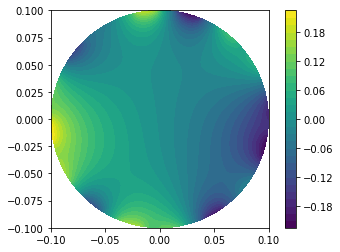

In [254]:
p = plot(potential(sigma, I, U_N))
plt.colorbar(p)

In [275]:
U_N

[-0.2806059215552159,
 0.15226996928933983,
 0.20583186212188126,
 -0.4797820583464596,
 0.42441183529941806,
 -0.07923445006629506,
 -0.2954556880551023,
 0.17661880343963307,
 0.37612402526168764,
 0.25821922444685963,
 -0.32110715992070765,
 0.30419587684020405,
 0.24030797665233222,
 -0.3891864938682824,
 0.06776372290094096,
 -0.3603715244402339]

In [223]:
alpha_N

20